In [105]:
import pandas as pd
import numpy as np
import yaml
debug=False
from __future__ import print_function
import datetime
def dateheure():
    return datetime.datetime.utcnow().strftime('%y%m%d%H%M')

In [ ]:
from IPython.html.widgets import FloatProgress
from IPython.display import display


In [ ]:
#MGC-150916-extend-01-X-paradigmes1509161530
folderPrefix="2015-Data/"
datePrefix="150916"
samplePrefix="02-X"
dateSuffix="1509180950"
fichierConjugaisons="%sMGC-%s-extend-%s-paradigmes%s.yaml"%(folderPrefix, datePrefix, samplePrefix, dateSuffix)
with open(fichierConjugaisons, 'r') as stream:
    conjugaisons=yaml.load(stream)

In [128]:
conjugaisons

{'escamoter': {'diff': [],
  'miss': [[u'ai2P : \xd8 \u2260 EskamOtat',
    u'ai2S : \xd8 \u2260 EskamOta',
    u'ii1S : \xd8 \u2260 EskamOtE',
    u'is1P : \xd8 \u2260 EskamOtasj\xf4',
    u'is1S : \xd8 \u2260 EskamOtas',
    u'is2P : \xd8 \u2260 EskamOtasje',
    u'is3P : \xd8 \u2260 EskamOtas',
    u'is3S : \xd8 \u2260 EskamOta',
    u'pi2S : \xd8 \u2260 EskamOt',
    u'ps1P : \xd8 \u2260 EskamOtj\xf4',
    u'ps2P : \xd8 \u2260 EskamOtje',
    u'ps3P : \xd8 \u2260 EskamOt',
    u'ps3S : \xd8 \u2260 EskamOt']],
  'ok': [['ai1P : EskamOtam',
    'ai1S : EskamOtE',
    'ai3P : EskamOtEr',
    'ai3S : EskamOta',
    u'fi1P : EskamOt6r\xf4',
    'fi1S : EskamOt6rE',
    'fi2P : EskamOt6re',
    'fi2S : EskamOt6ra',
    u'fi3P : EskamOt6r\xf4',
    'fi3S : EskamOt6ra',
    u'ii1P : EskamOtj\xf4',
    'ii2P : EskamOtje',
    'ii2S : EskamOtE',
    'ii3P : EskamOtE',
    'ii3S : EskamOtE',
    'inf : EskamOte',
    u'pI1P : EskamOt\xf4',
    'pI2P : EskamOte',
    'pI2S : EskamOt',
    u'pP

In [107]:
fichierLexique="%sMGC-%s-extend-%s-paradigmes.csv"%(folderPrefix, datePrefix, samplePrefix)
lexique=pd.read_csv(fichierLexique,sep=";",encoding="utf8")
del lexique["Unnamed: 0"]
lexicalComptages=lexique.count()
print (lexicalComptages.index.tolist())

[u'lexeme', u'ai1P', u'ai1S', u'ai2P', u'ai2S', u'ai3P', u'ai3S', u'fi1P', u'fi1S', u'fi2P', u'fi2S', u'fi3P', u'fi3S', u'ii1P', u'ii1S', u'ii2P', u'ii2S', u'ii3P', u'ii3S', u'inf', u'is1P', u'is1S', u'is2P', u'is3P', u'is3S', u'pI1P', u'pI2P', u'pI2S', u'pP', u'pc1P', u'pc1S', u'pc2P', u'pc2S', u'pc3P', u'pc3S', u'pi1P', u'pi1S', u'pi2P', u'pi2S', u'pi3P', u'pi3S', u'ppFP', u'ppFS', u'ppMP', u'ppMS', u'ps1P', u'ps1S', u'ps2P', u'ps2S', u'ps3P', u'ps3S']


In [172]:
%%time
progressBar = FloatProgress(min=0, max=len(conjugaisons))
display(progressBar)
comptage={}
comptageNbFormesLexicales={}
for n,verbe in enumerate(conjugaisons):
    progressBar.value=n
    formesLexicales=[]
    for element in lexique[lexique["lexeme"]==verbe]:
        if not pd.isnull(lexique[lexique["lexeme"]==verbe][element].item()) and element!="lexeme":
#            print ("e,l",element,lexique[lexique["lexeme"]==verbe][element].item())
            elementLexical=u"%s : %s"%(element,lexique[lexique["lexeme"]==verbe][element].item())
#            print (elementLexical)
            formesLexicales.append(elementLexical)
    conjugaisons[verbe]["lexical"]=formesLexicales
    nbFormesLexicales=len(formesLexicales)
    if debug: print (nbFormesLexicales,formesLexicales)
    if not nbFormesLexicales in comptageNbFormesLexicales:
        comptageNbFormesLexicales[nbFormesLexicales]={}
    for element in conjugaisons[verbe]:
        if conjugaisons[verbe][element] and element!="lexical":
            if not element in comptage:
                comptage[element]={}
            if not element in comptageNbFormesLexicales[nbFormesLexicales]:
                comptageNbFormesLexicales[nbFormesLexicales][element]={}
            cases=conjugaisons[verbe][element][0]
            for case in cases:
                nomCase=case.split(":")[0].strip()
                if not nomCase in comptage[element]:
                    comptage[element][nomCase]=0
                if not nomCase in comptageNbFormesLexicales[nbFormesLexicales][element]:
                    comptageNbFormesLexicales[nbFormesLexicales][element][nomCase]=0
#                    print (element,nomCase)
                comptage[element][nomCase]+=1
                comptageNbFormesLexicales[nbFormesLexicales][element][nomCase]+=1
comptage["lexical"]={}
for case in lexicalComptages.index:
    if case!="lexeme":
        comptage["lexical"][case]=lexicalComptages[case]
    
        

CPU times: user 3min 15s, sys: 660 ms, total: 3min 16s
Wall time: 3min 19s


In [109]:
analyse=pd.DataFrame(comptage)
analyse["ok"]=analyse["ok"]-analyse["lexical"]

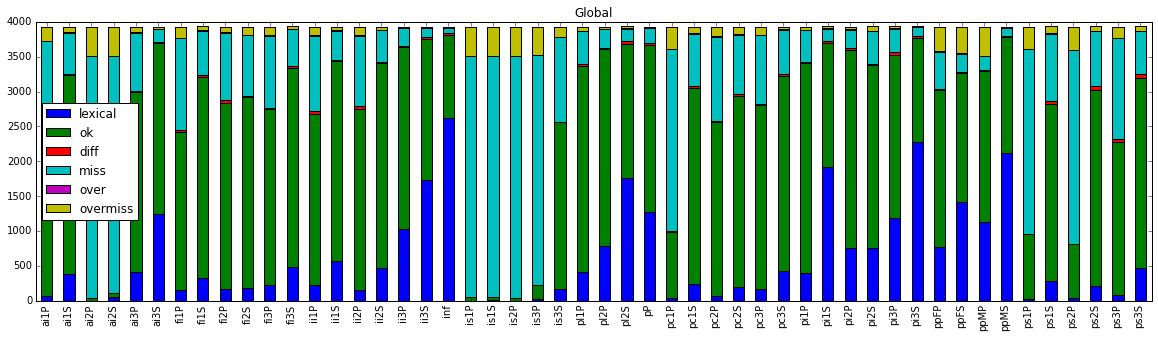

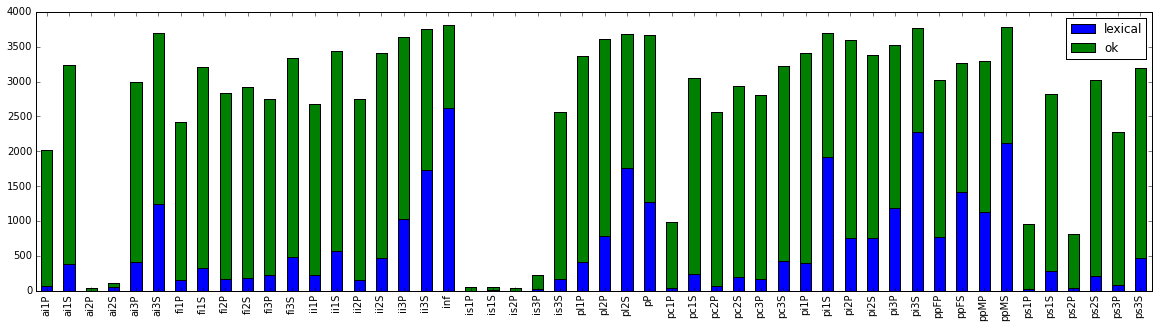

In [220]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 5
plt.figure()
analyse[["lexical","ok","diff","miss","over","overmiss"]].plot(kind="bar", stacked=True)
plt.title("Global")
analyse[["lexical","ok"]].plot(kind="bar", stacked=True)


In [ ]:
analysesNb={}
for nb in comptageNbFormesLexicales:
    analysesNb[nb]=pd.DataFrame(comptageNbFormesLexicales[nb])

1 


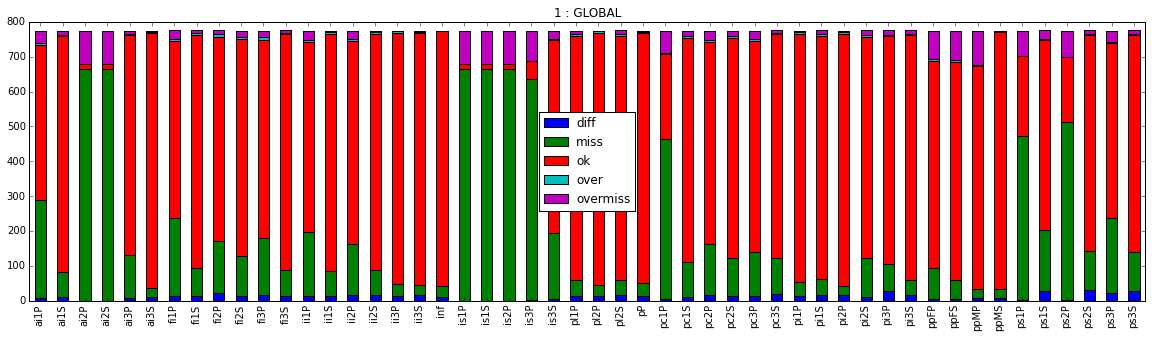

2 


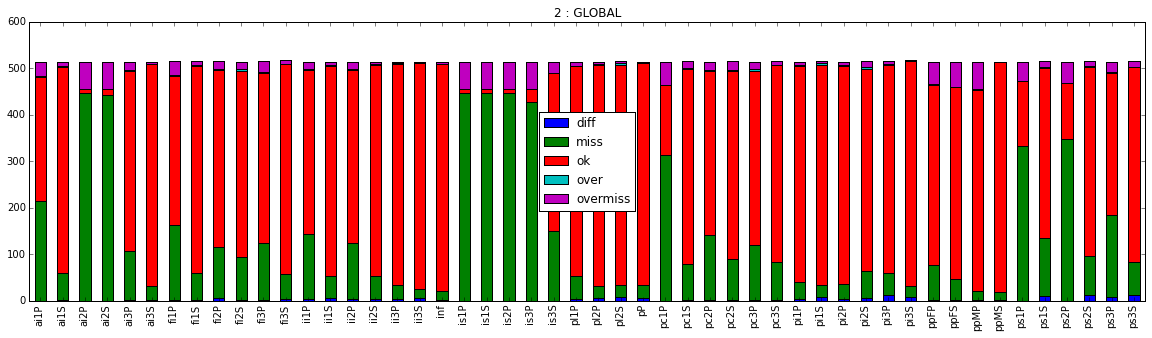

3 


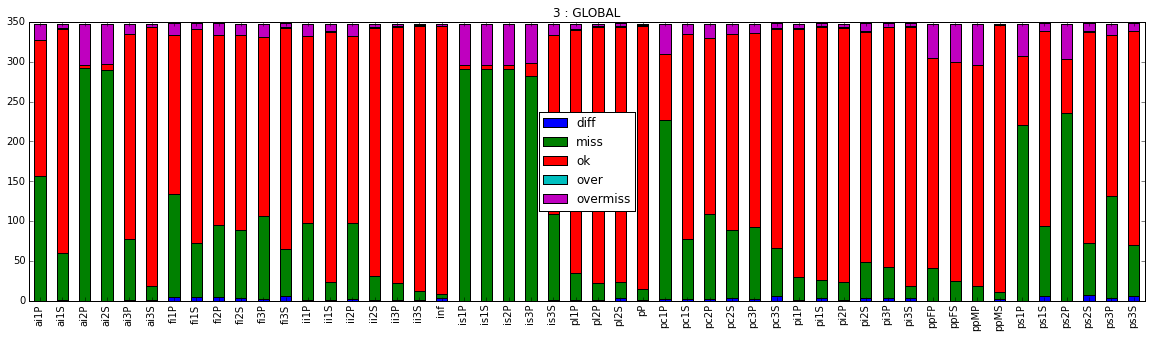

4 


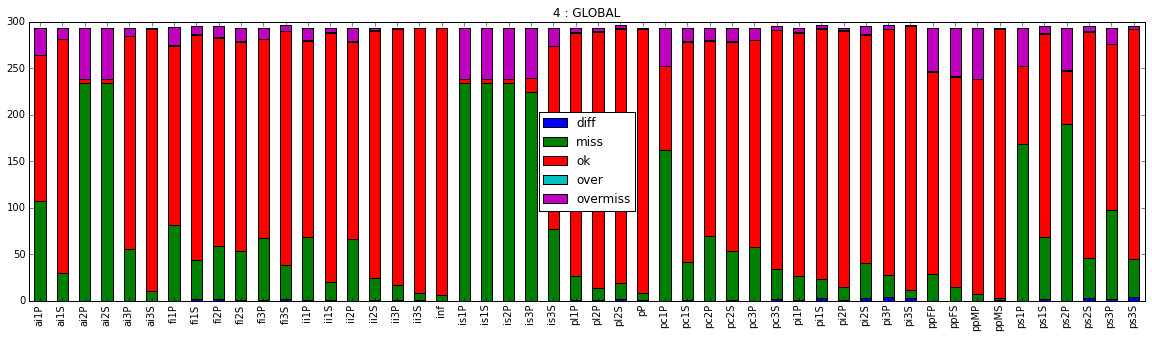

5 


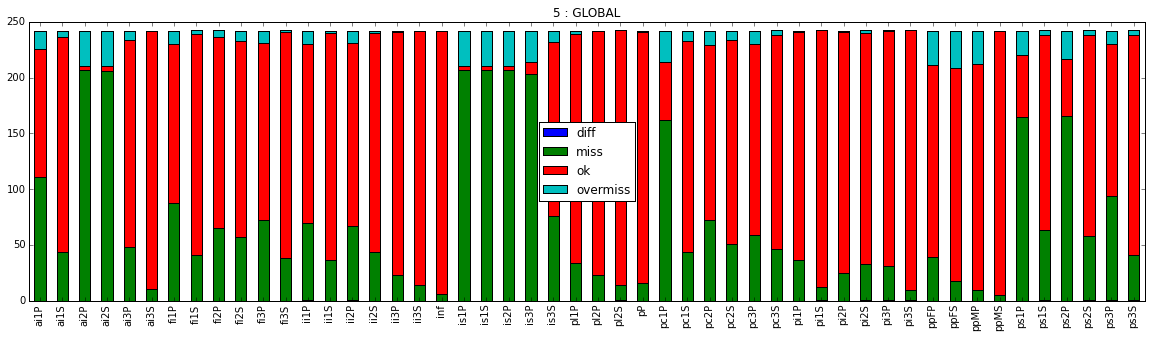

6 


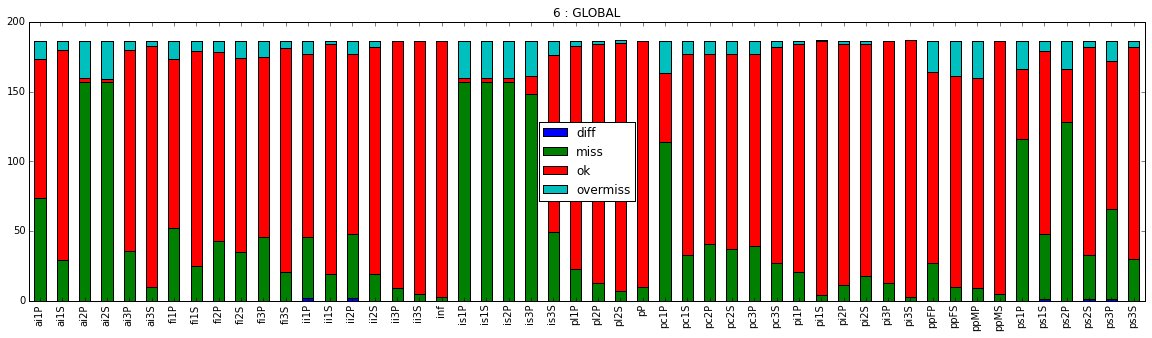

7 


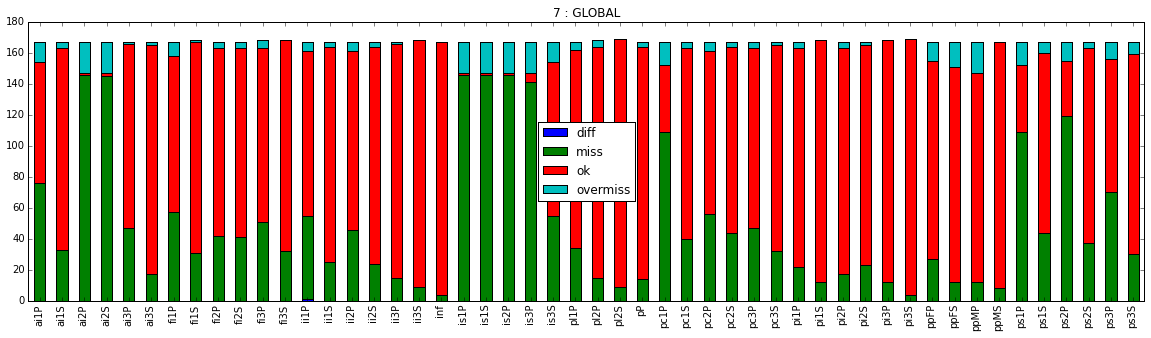

8 


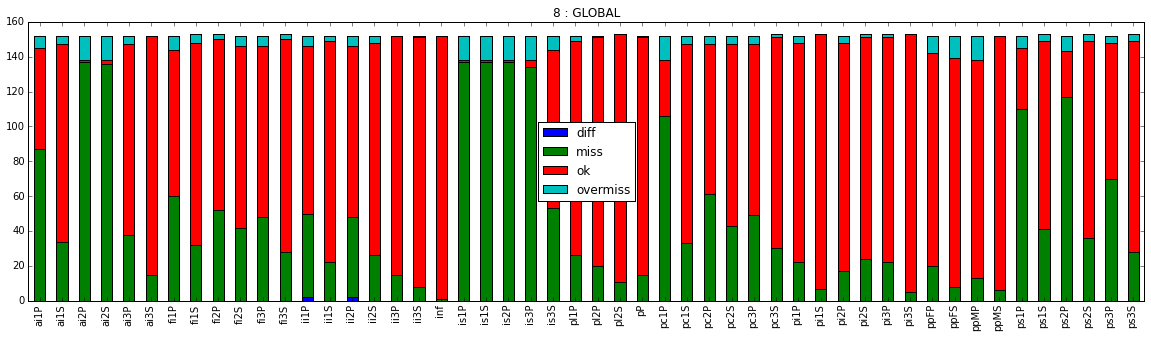

9 


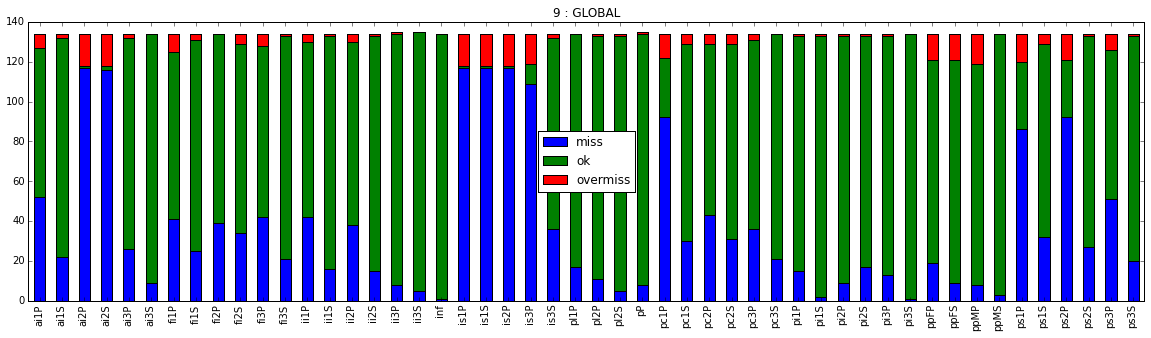

10 


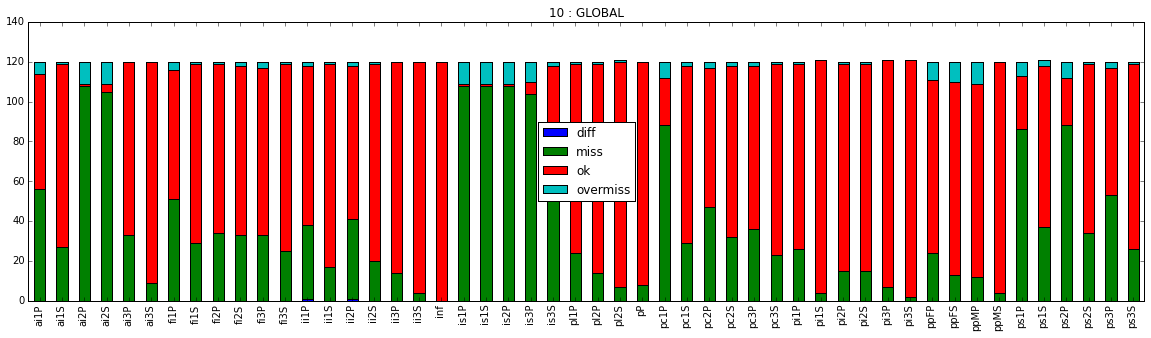

11 


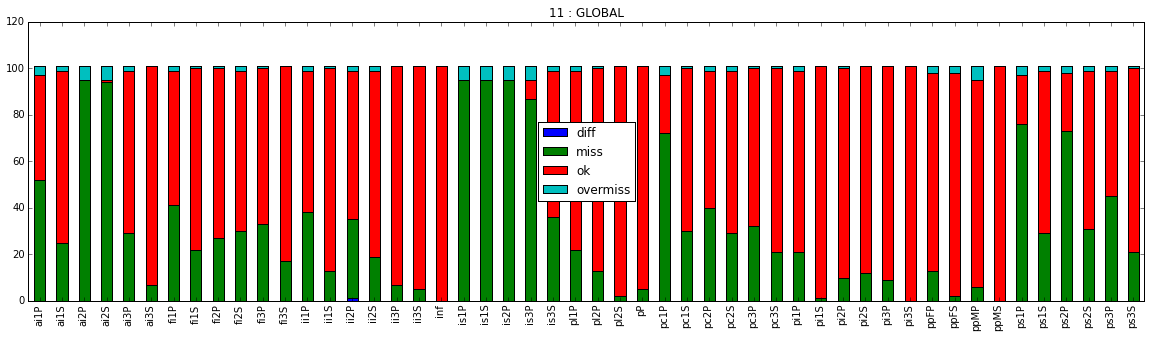

12 


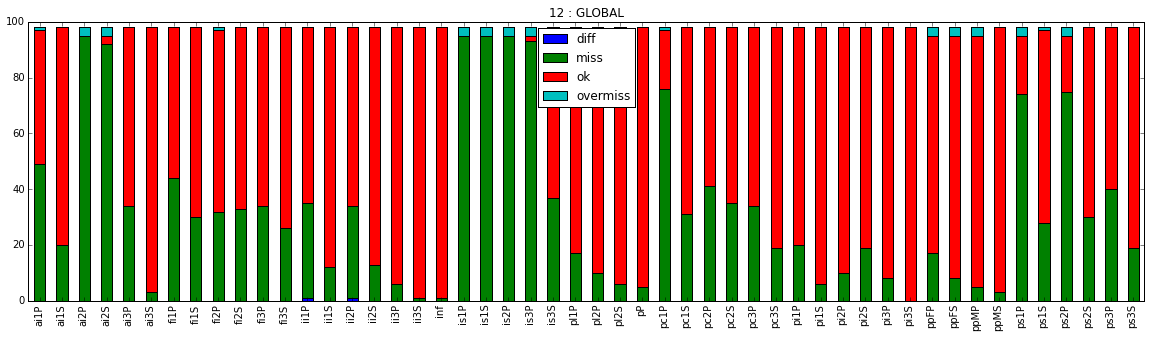

13 


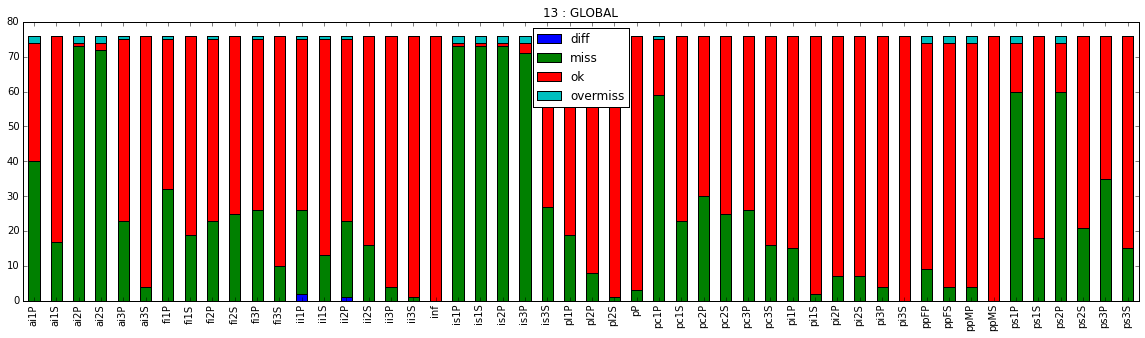

14 


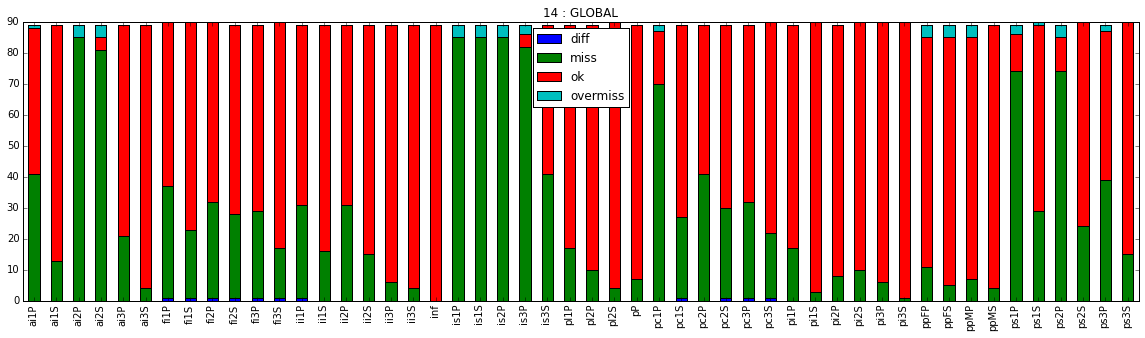

15 


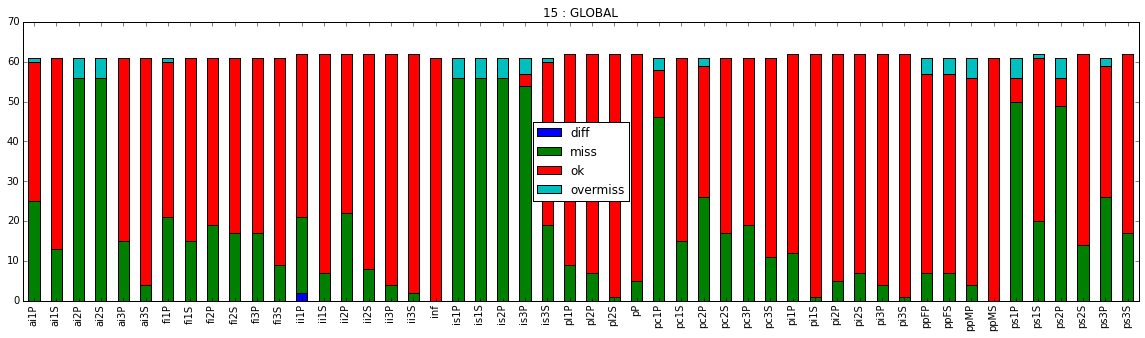

16 


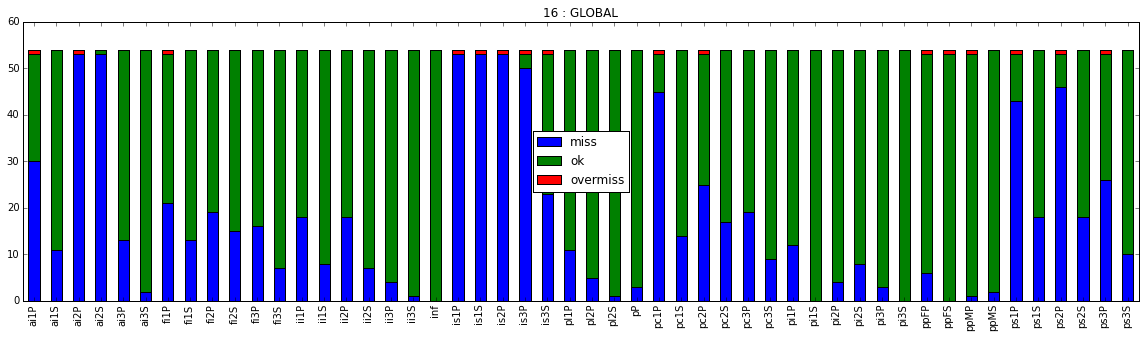

17 


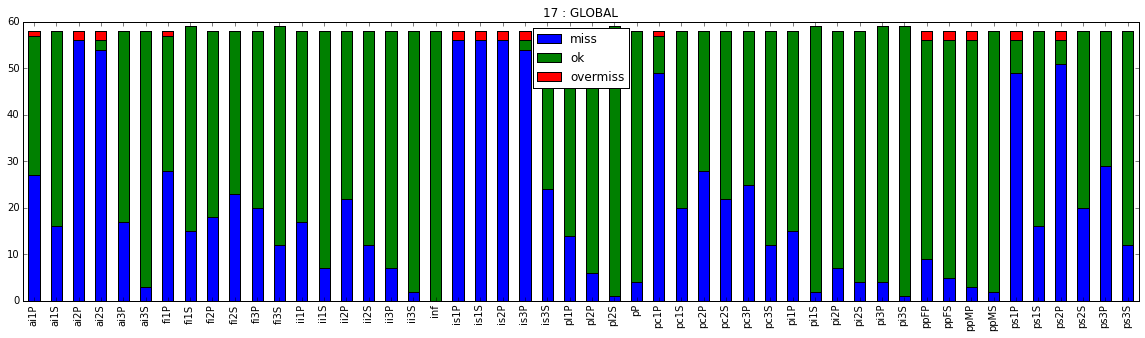

18 


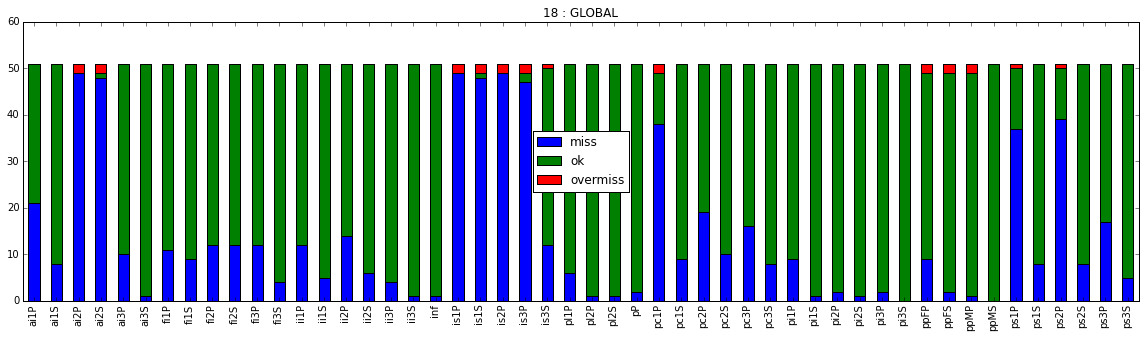

19 


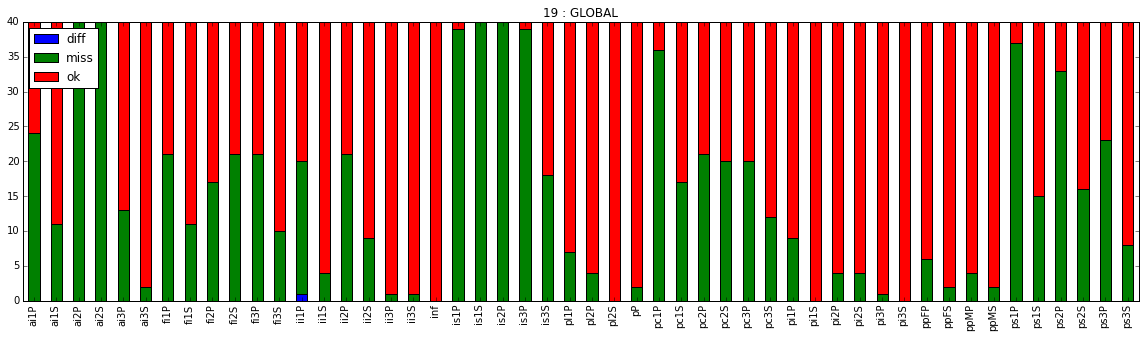

20 


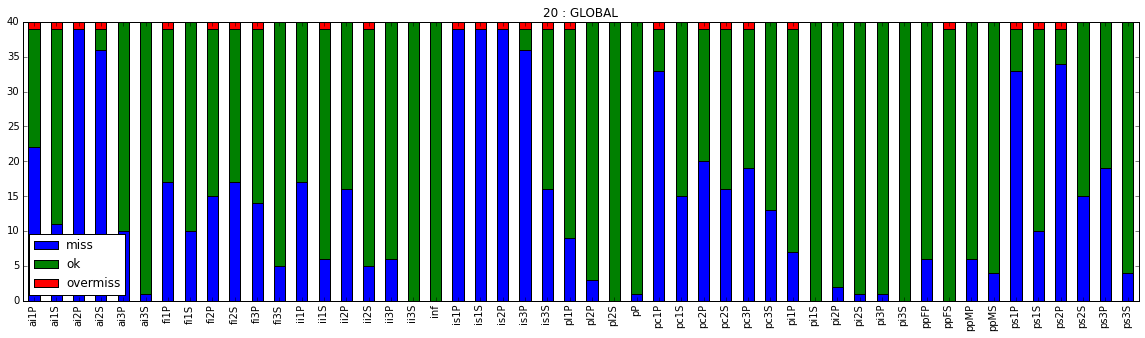

21 


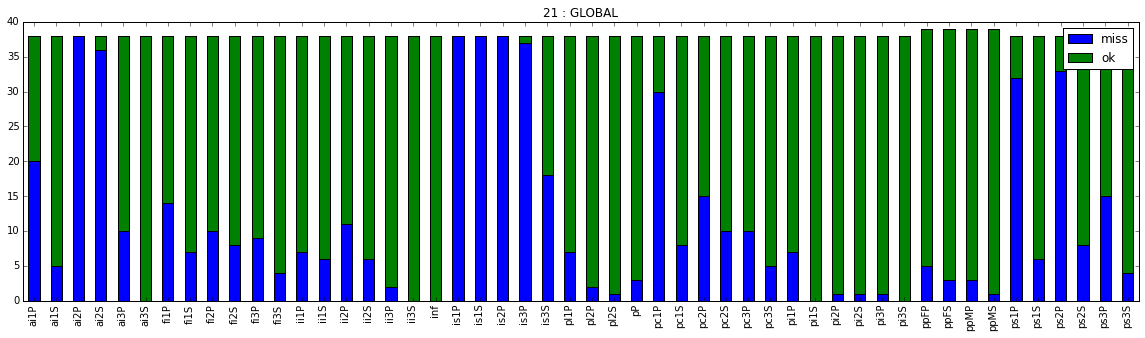

22 


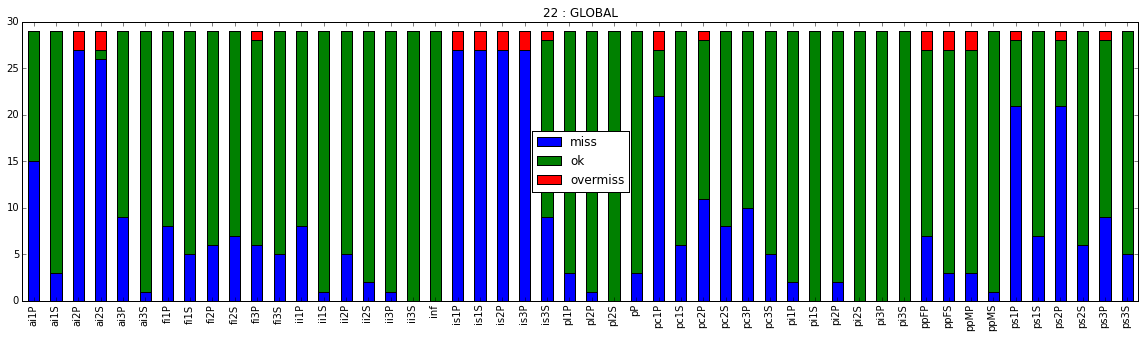

23 


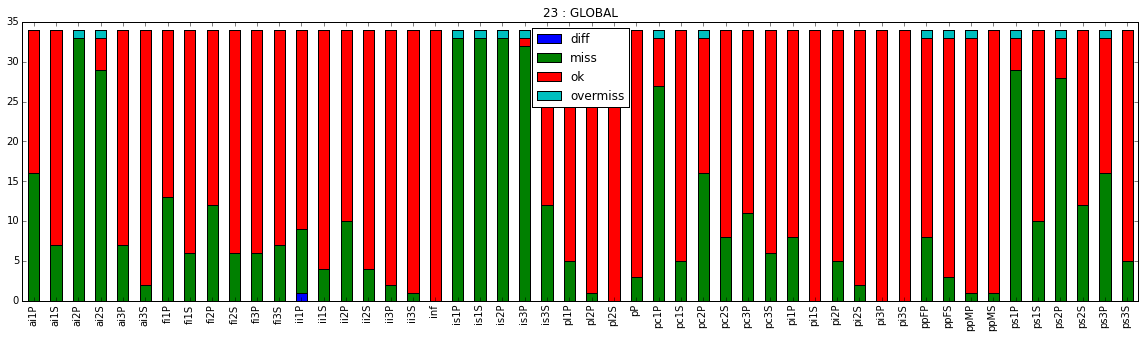

24 


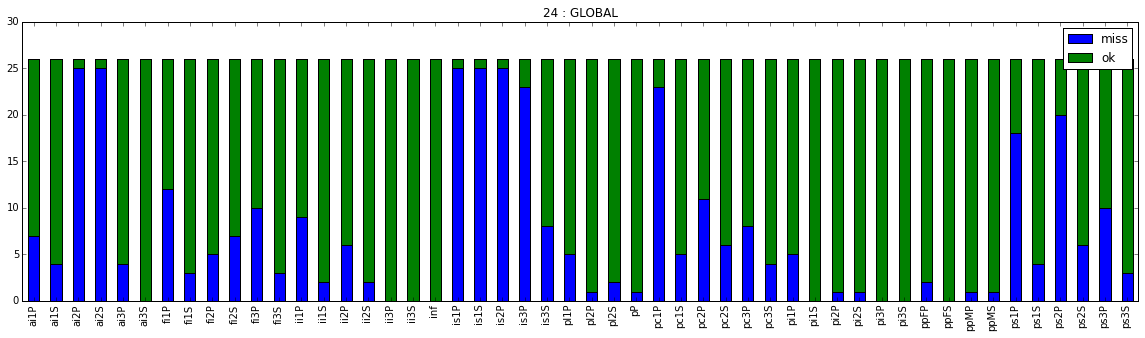

25 


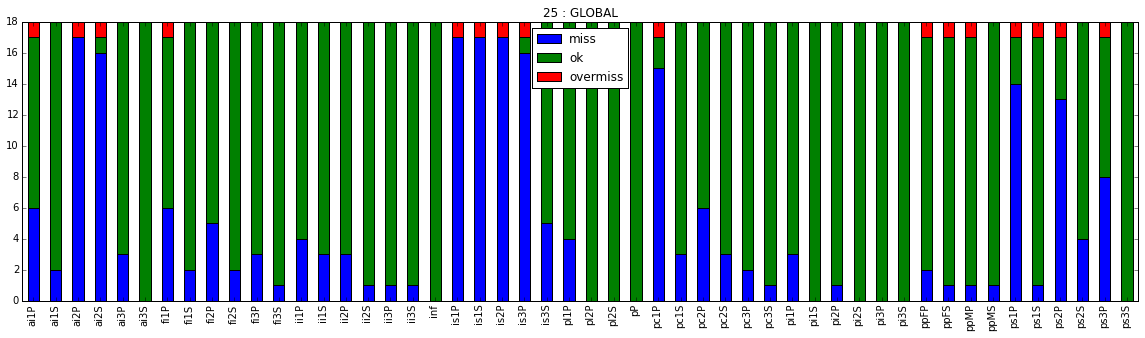

26 


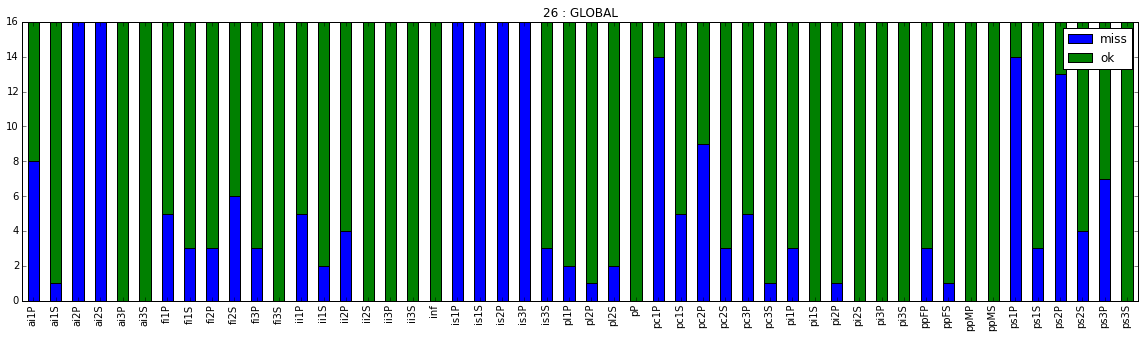

27 


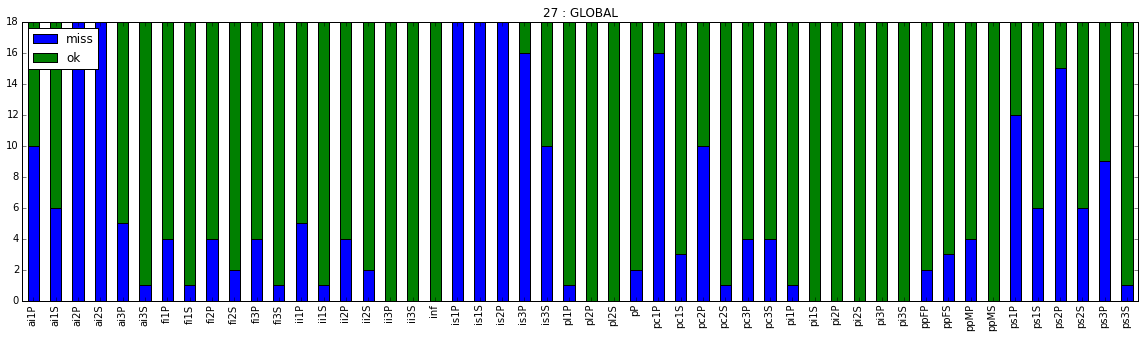

28 


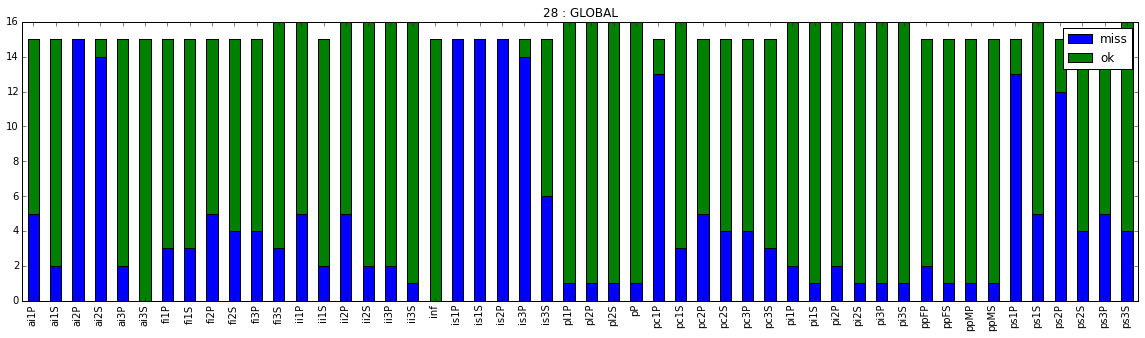

29 


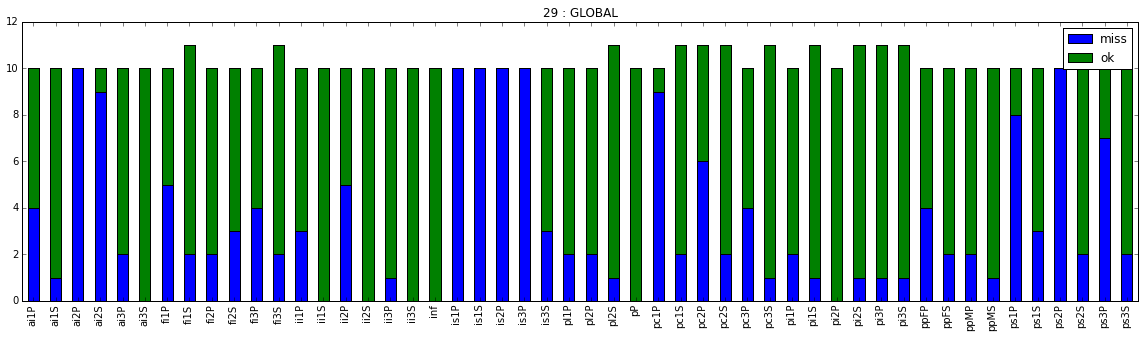

30 


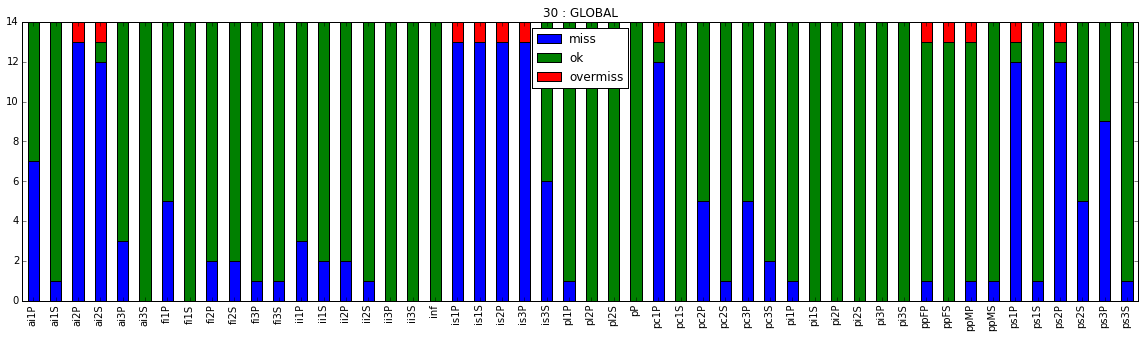

31 


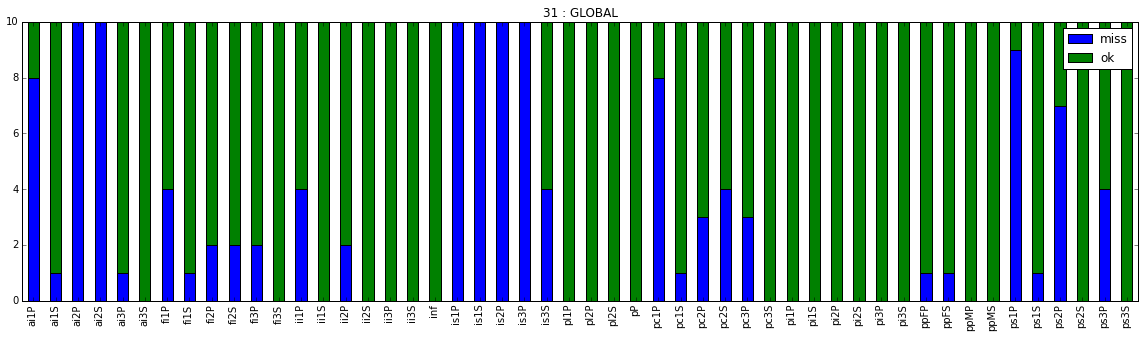

32 


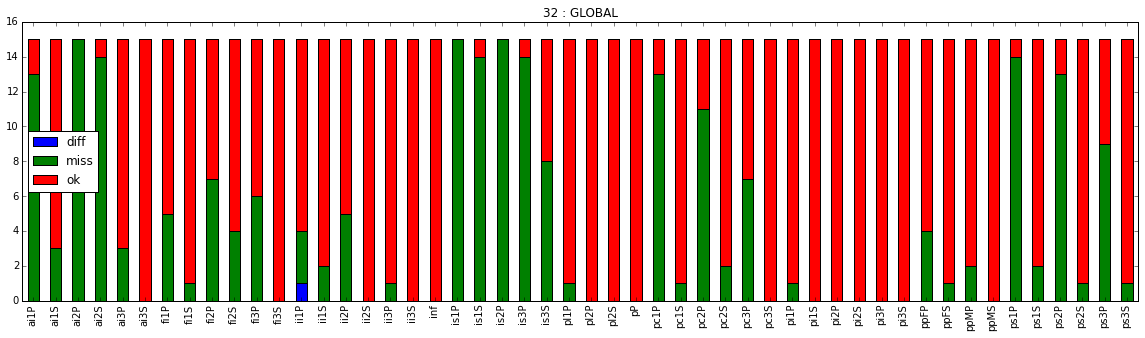

33 


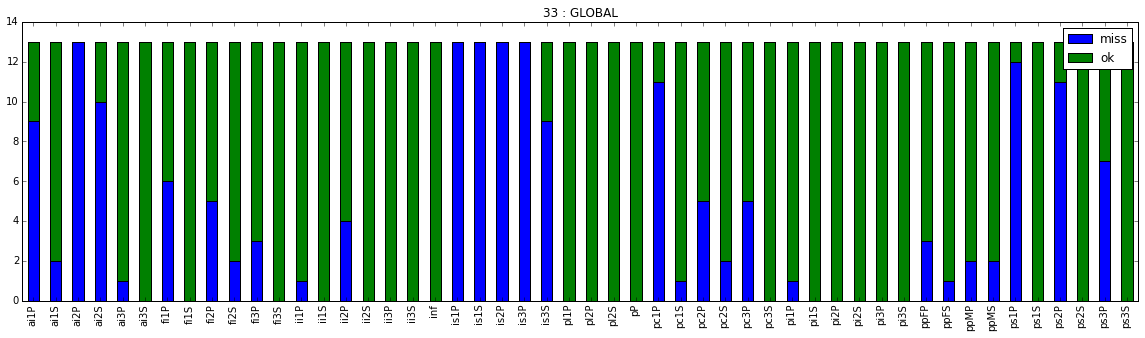

34 


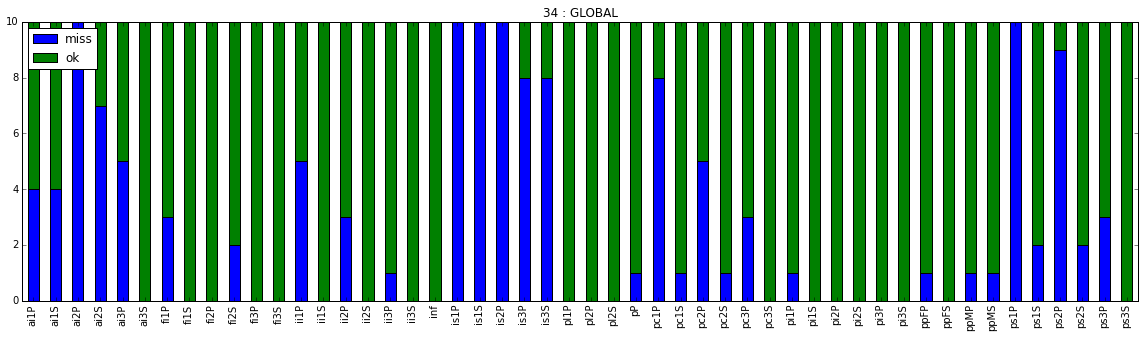

35 


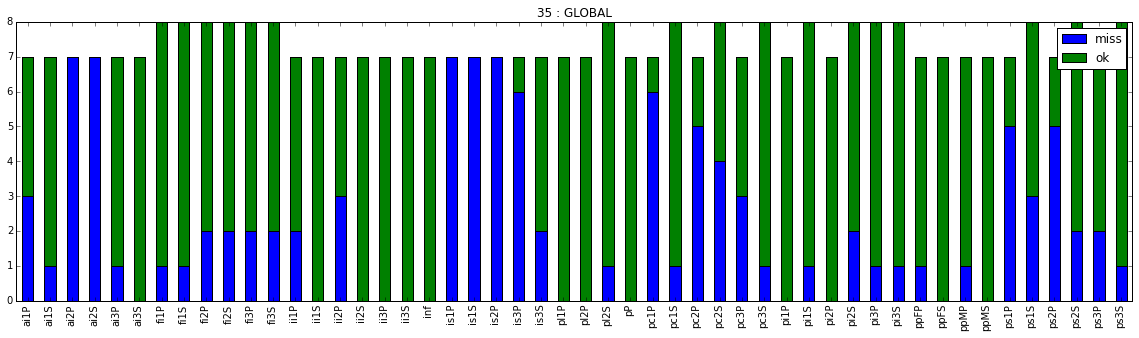

36 


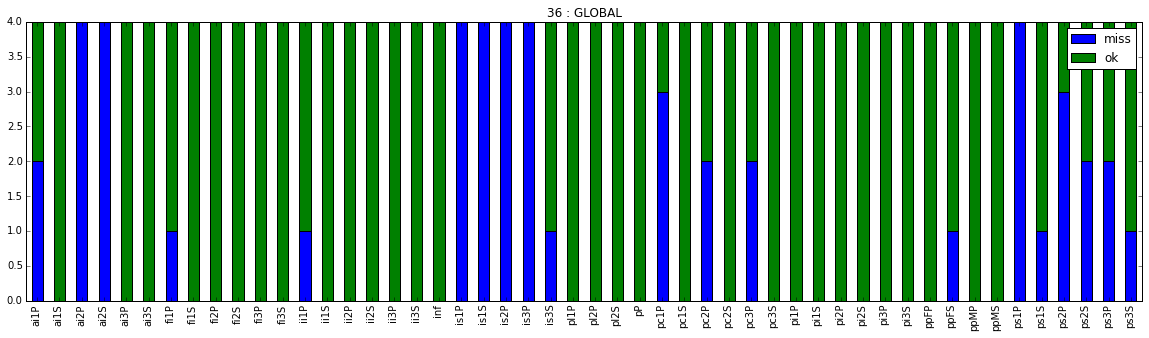

37 


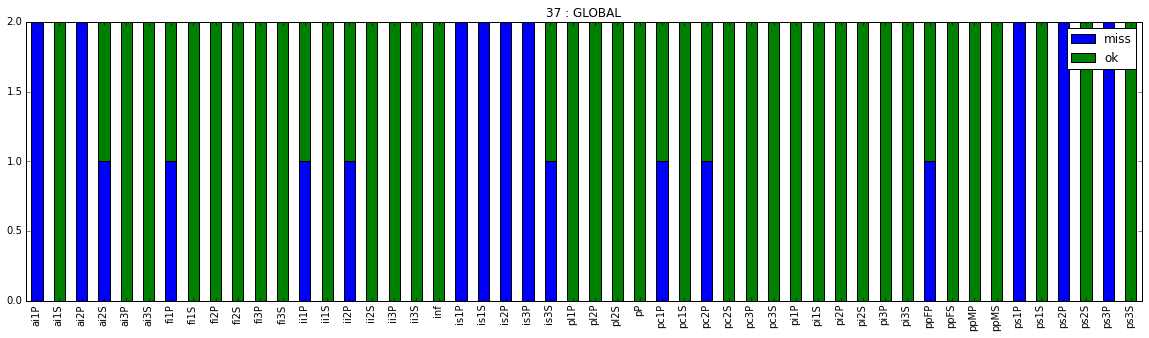

38 


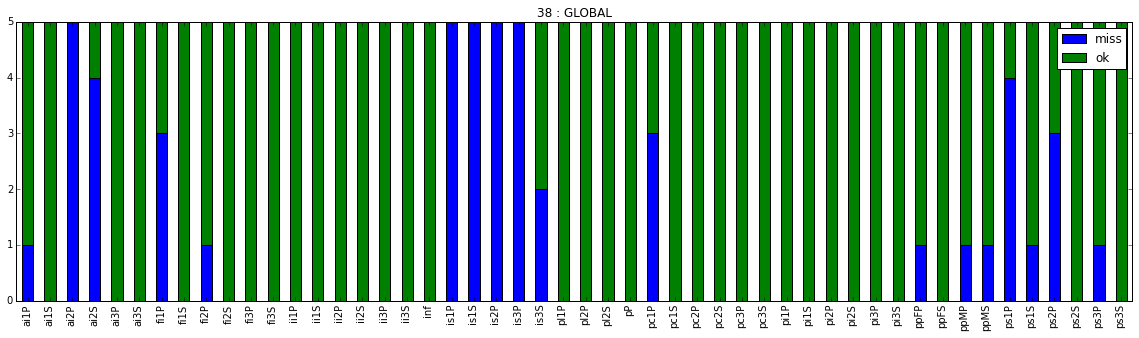

39 


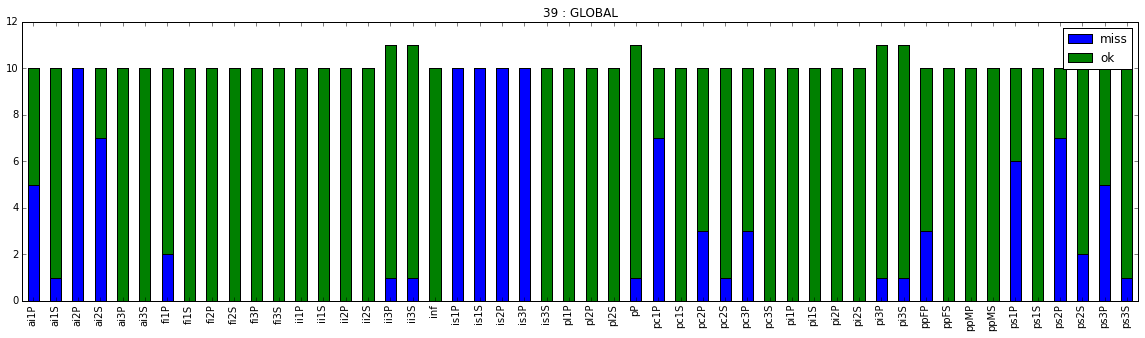

40 


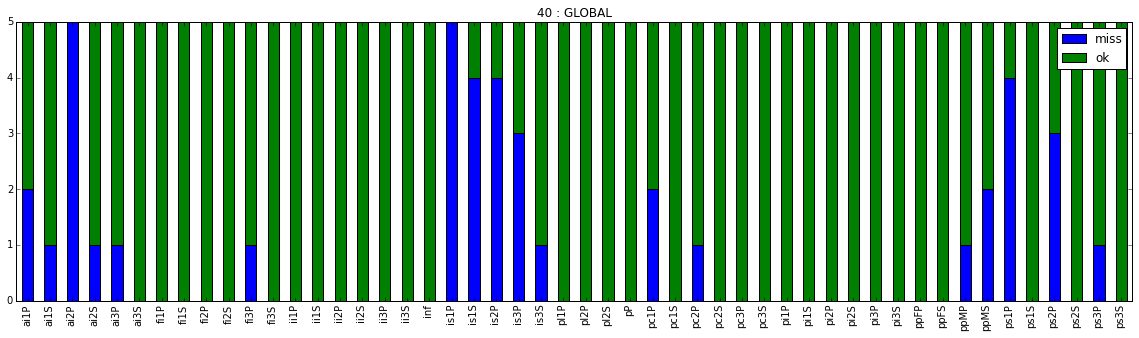

41 


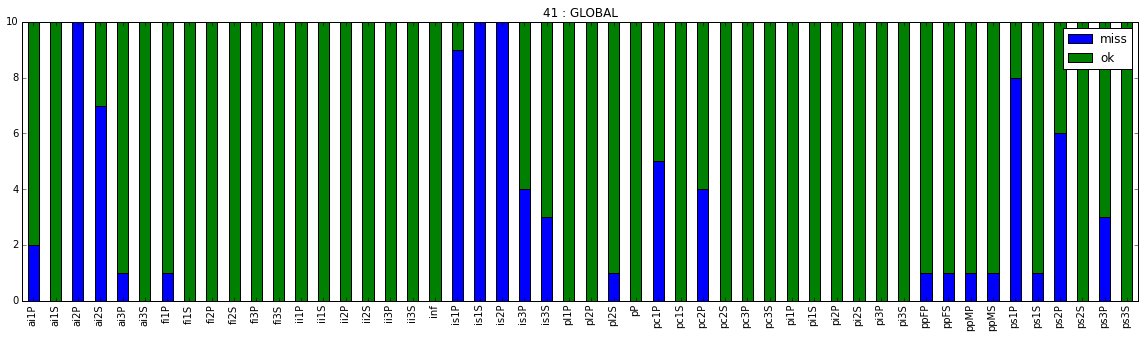

42 


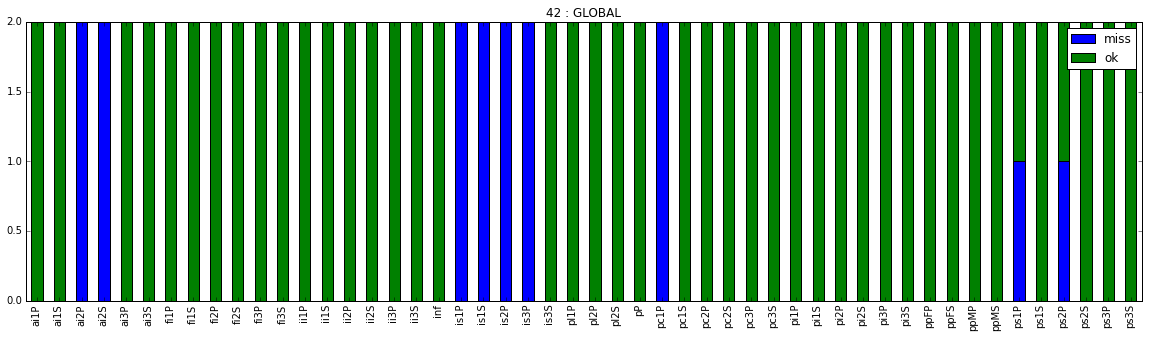

43 


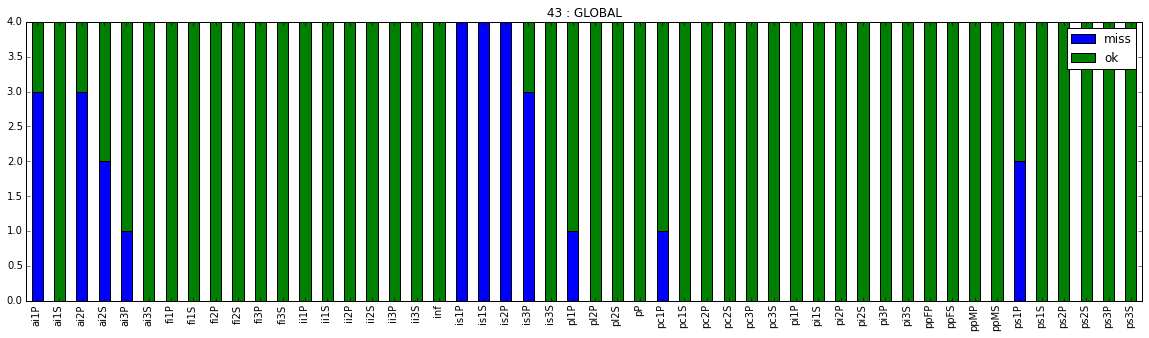

44 


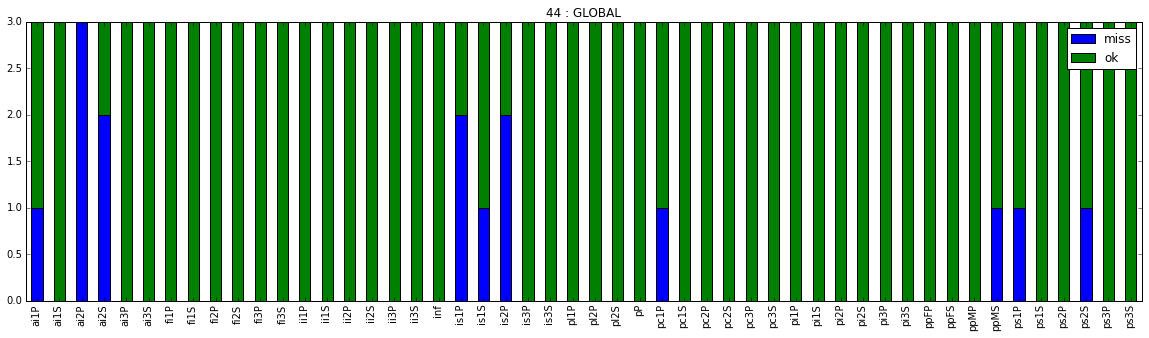

45 


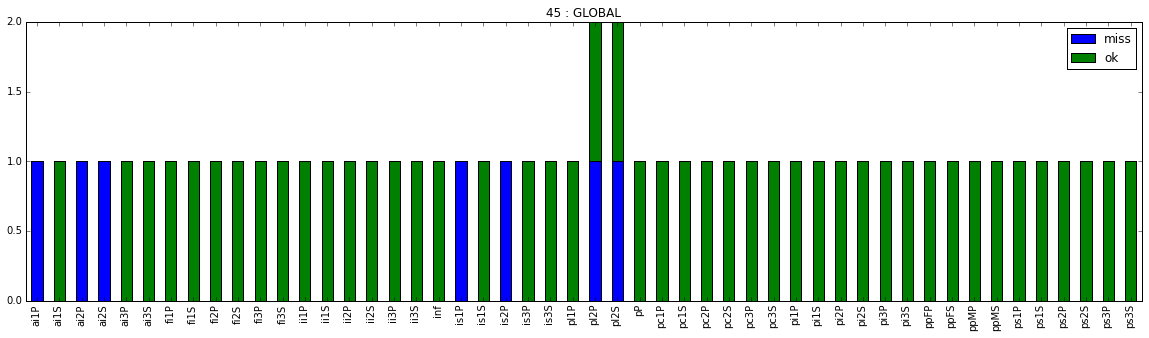

47 


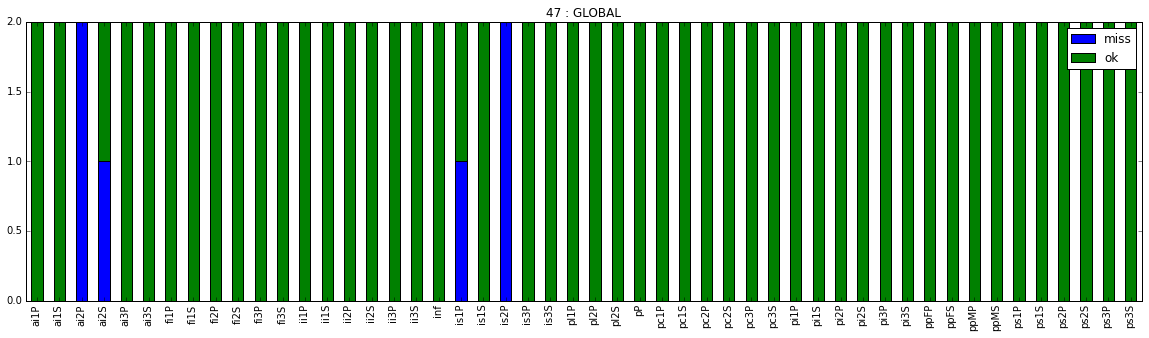

In [228]:
dimensions=[]
for nb in analysesNb:
    df=analysesNb[nb]
#    df.plot(kind="bar", stacked=True)
#    print (nb,", ".join(dimensions))
    if not dimensions:
        df.plot(kind="bar", stacked=True)
        plt.title("%d : GLOBAL"%nb)
    elif all(x in df.columns.values.tolist() for x in dimensions):
        df[dimensions].plot(kind="bar", stacked=True)
        plt.title("%d : "%(nb)+", ".join(dimensions))
    plt.show()

In [239]:
analysesCasesNb={}
for nb in comptageNbFormesLexicales:
    for element in comptageNbFormesLexicales[nb]:
        for case in comptageNbFormesLexicales[nb][element]:
            if not case in analysesCasesNb:
                analysesCasesNb[case]={}
            if not element in analysesCasesNb[case]:
                analysesCasesNb[case][element]={}
#            print (nb,case,element,comptageNbFormesLexicales[nb][element][case])
            if case in comptageNbFormesLexicales[nb][element]:
                analysesCasesNb[case][element][nb]=comptageNbFormesLexicales[nb][element][case]
            else:
                analysesCasesNb[case][element][nb]=0

analysesCase={}
for case in analysesCasesNb:
    analysesCase[case]=pd.DataFrame(analysesCasesNb[case])    

Legend


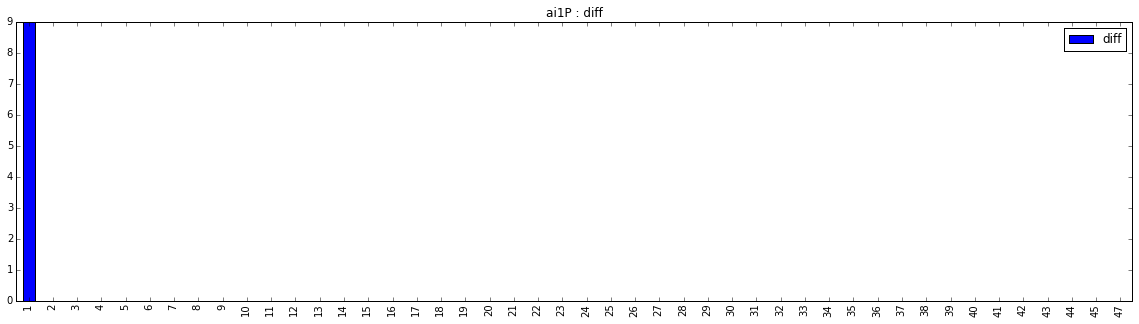

Legend


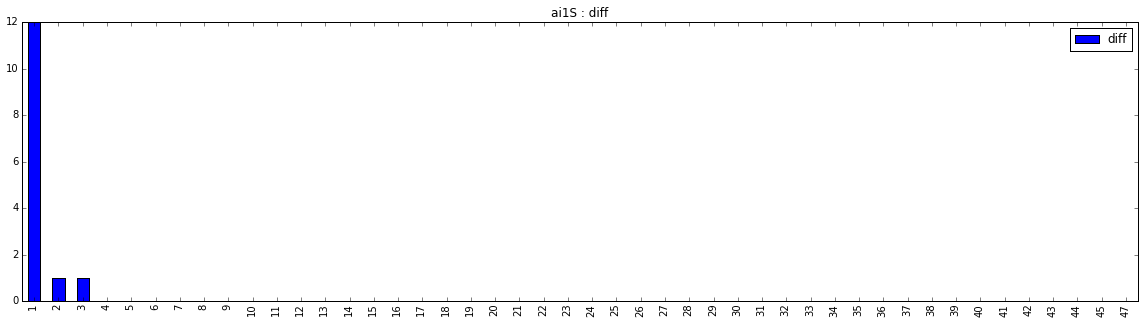

None


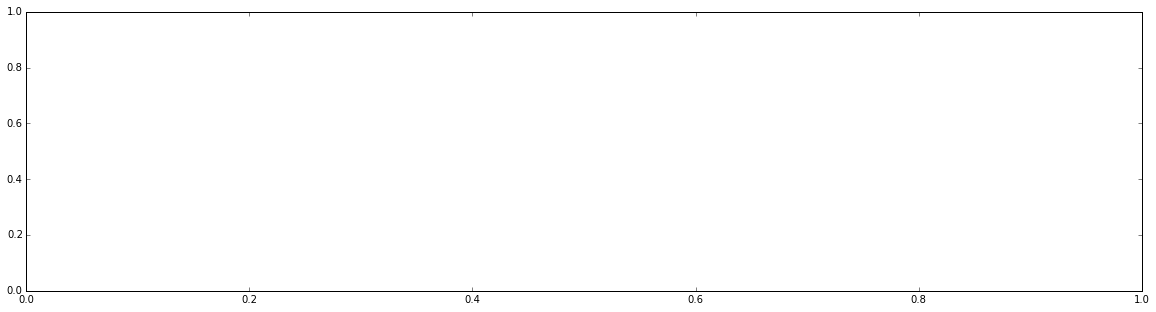

None


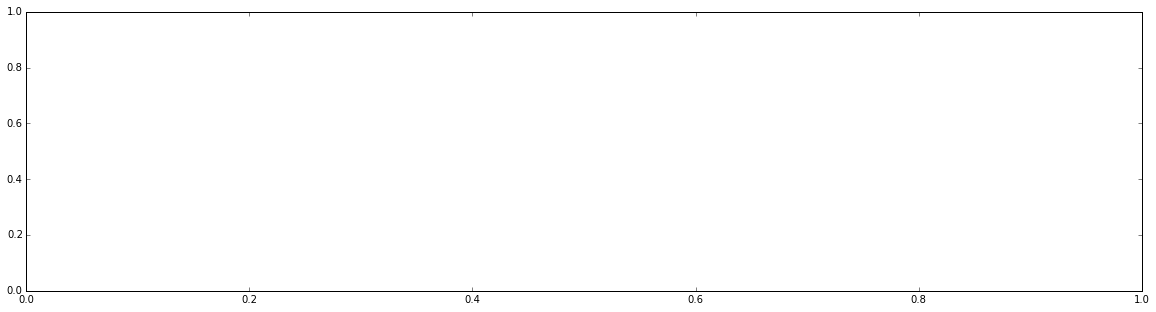

Legend


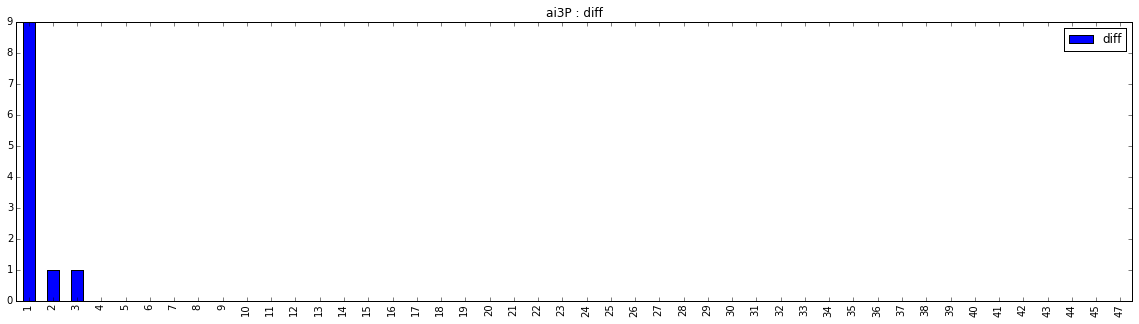

Legend


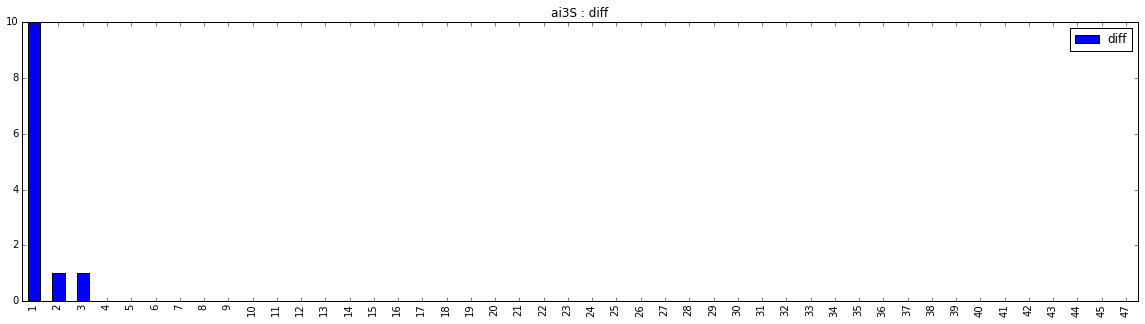

Legend


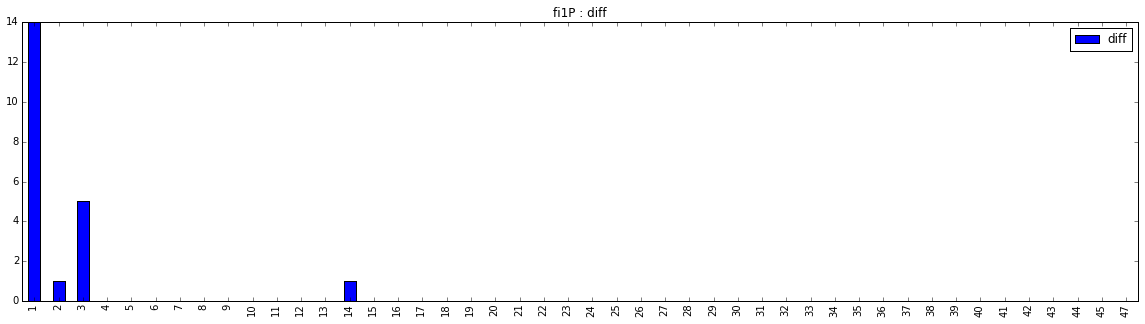

Legend


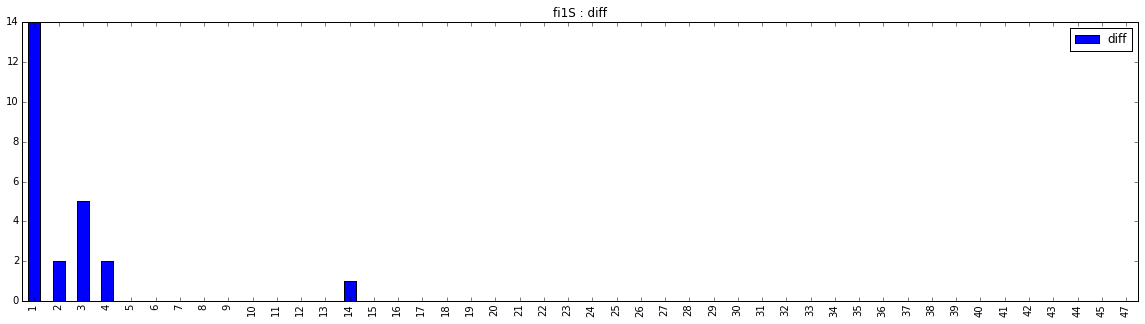

Legend


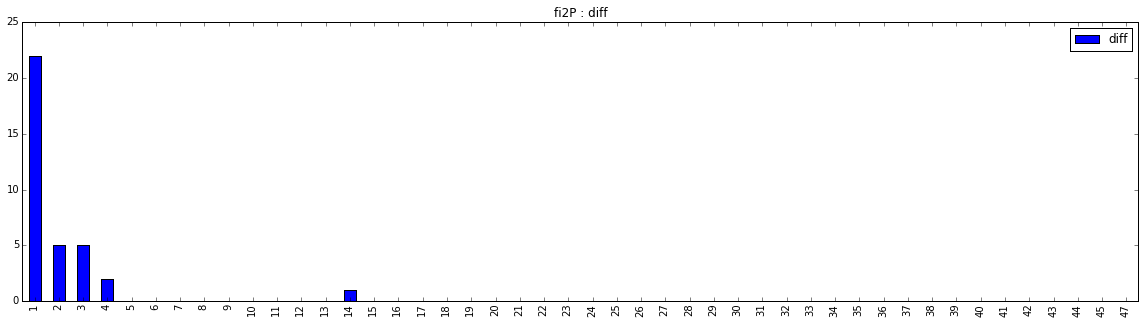

Legend


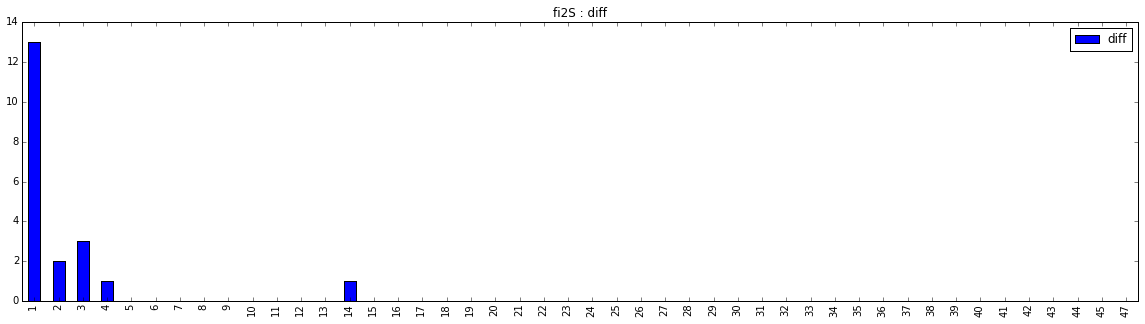

Legend


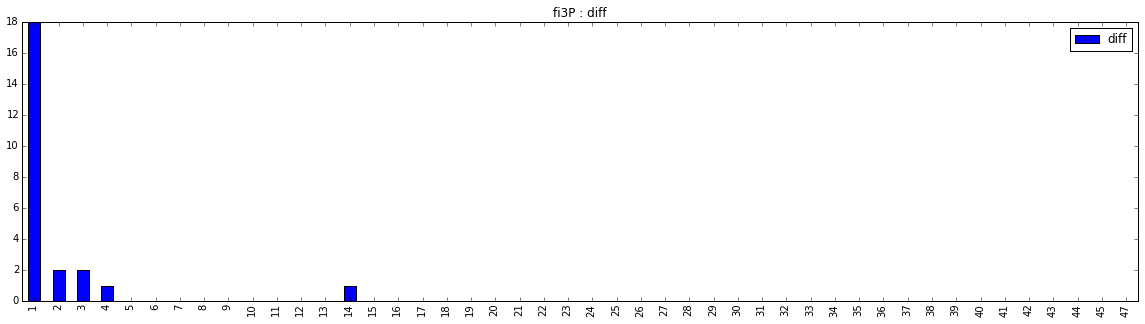

Legend


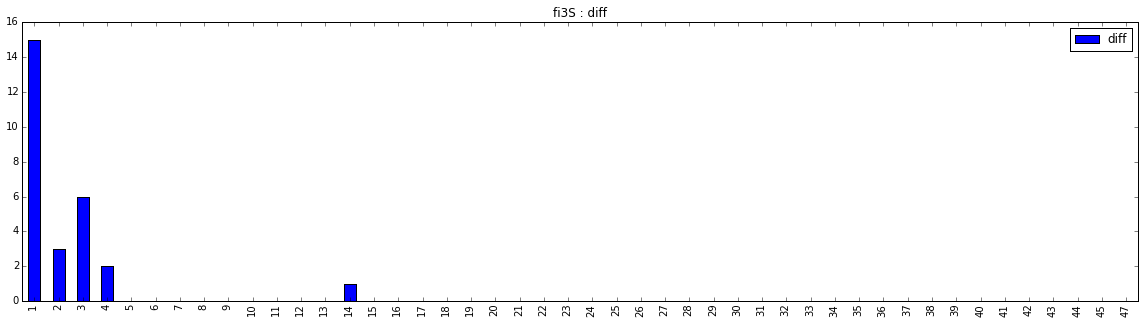

Legend


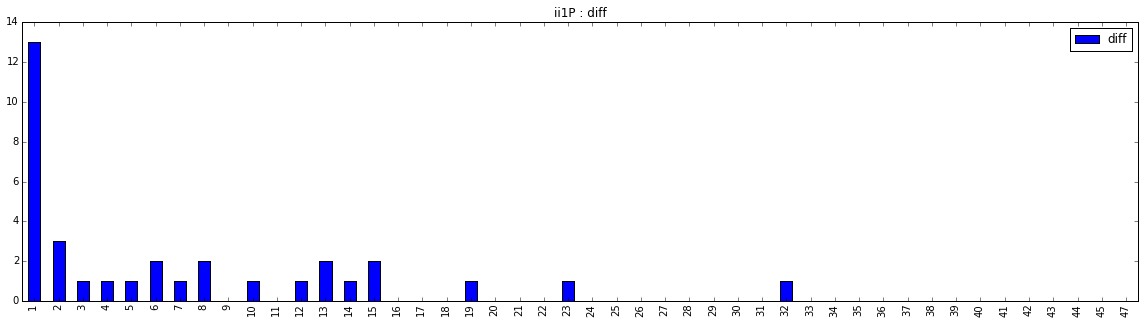

Legend


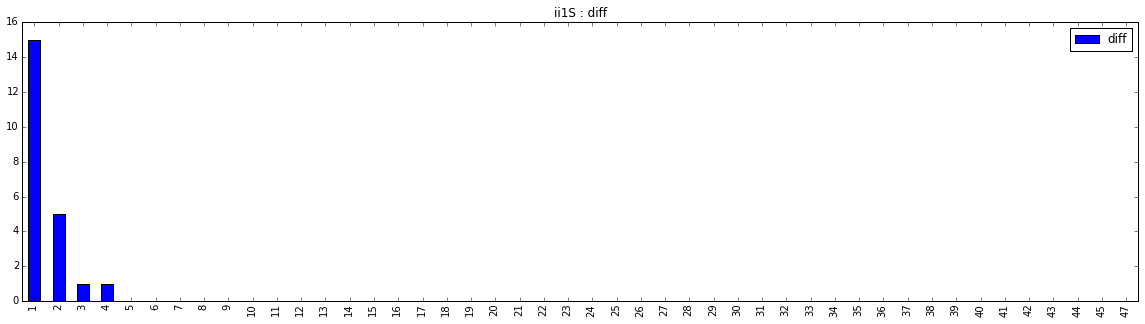

Legend


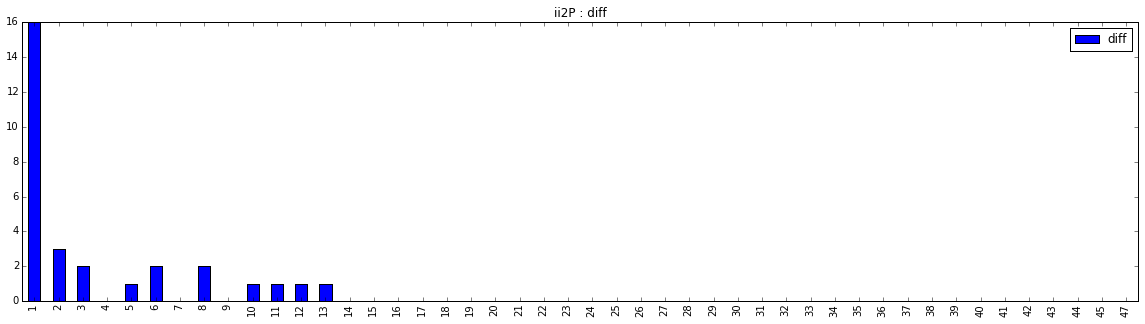

Legend


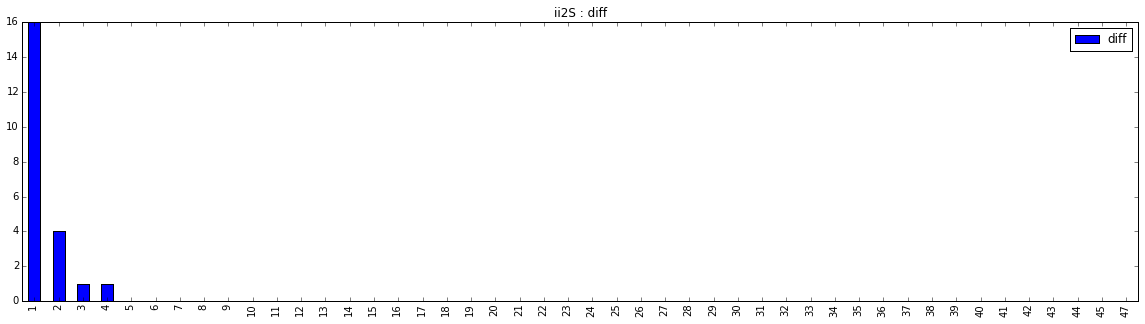

Legend


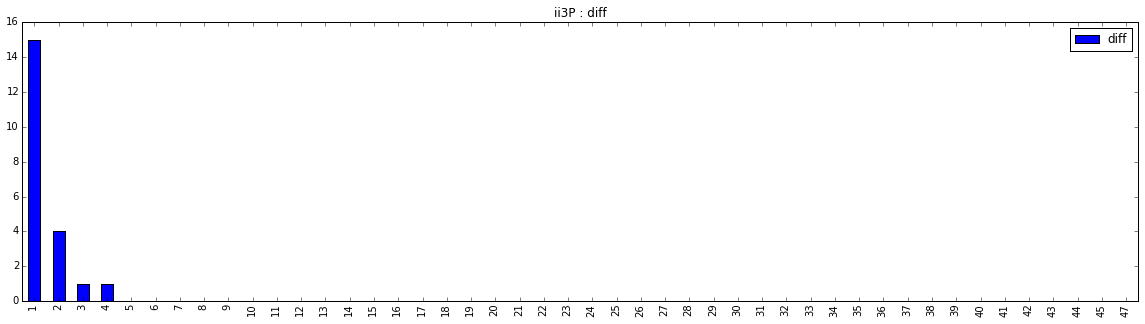

Legend


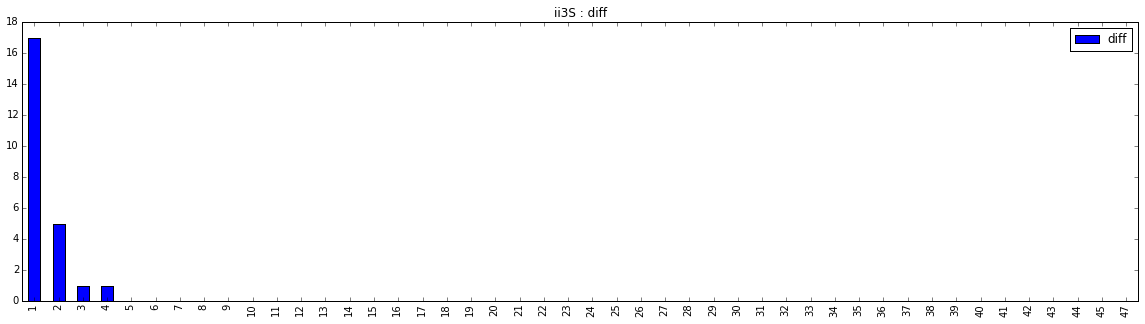

Legend


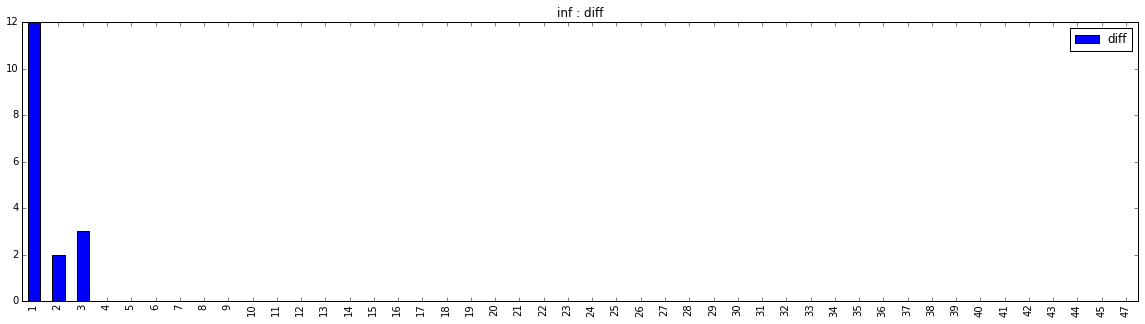

None


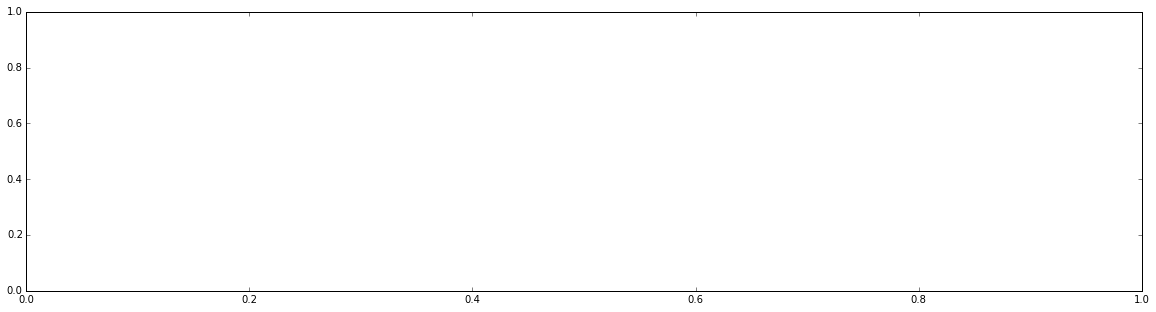

None


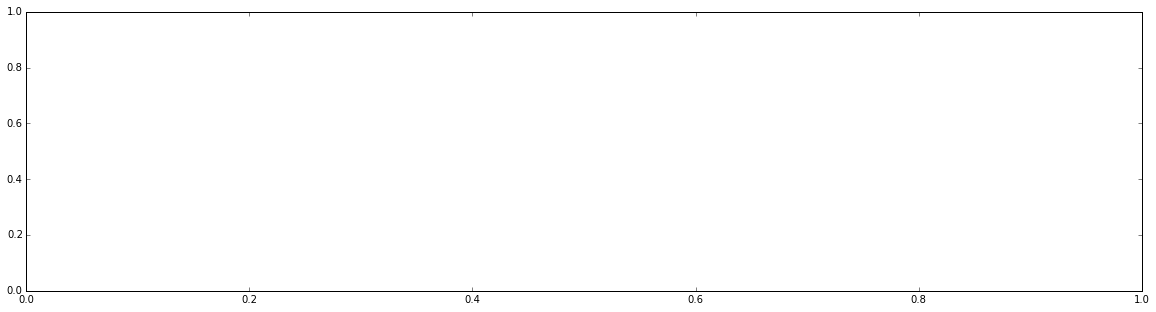

None


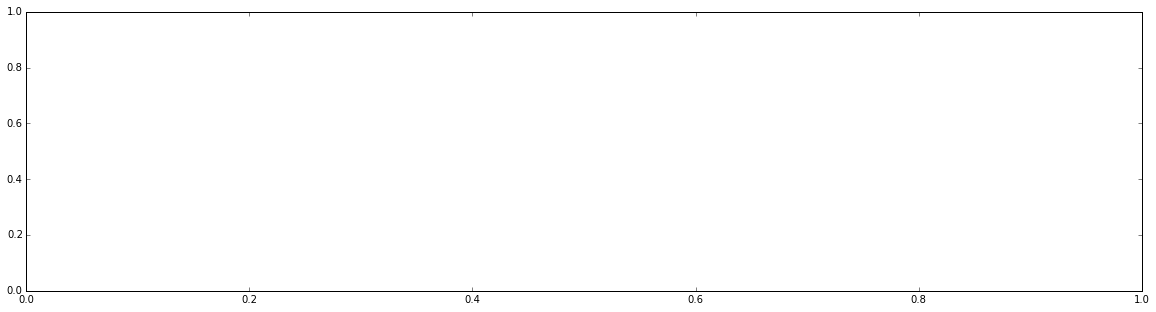

Legend


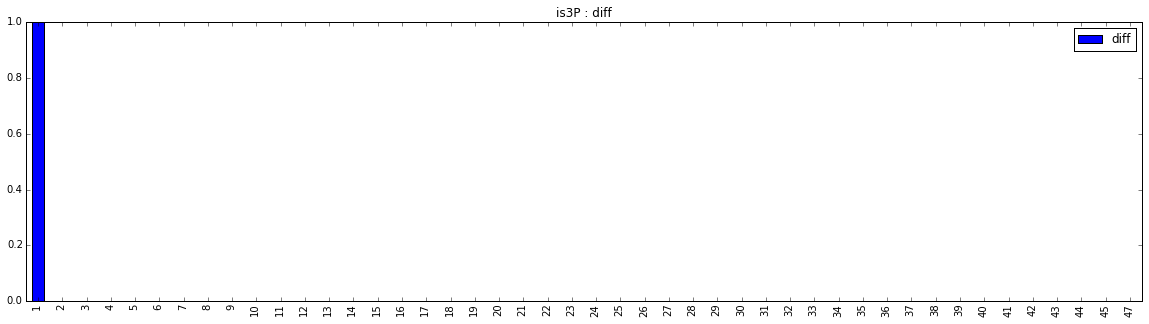

Legend


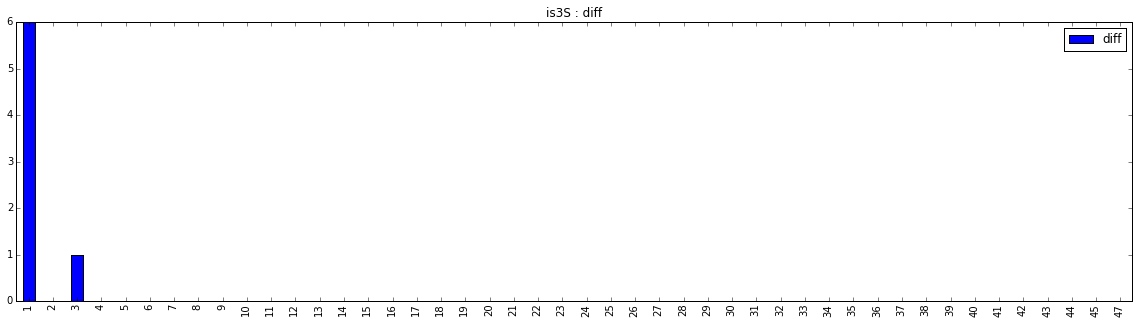

Legend


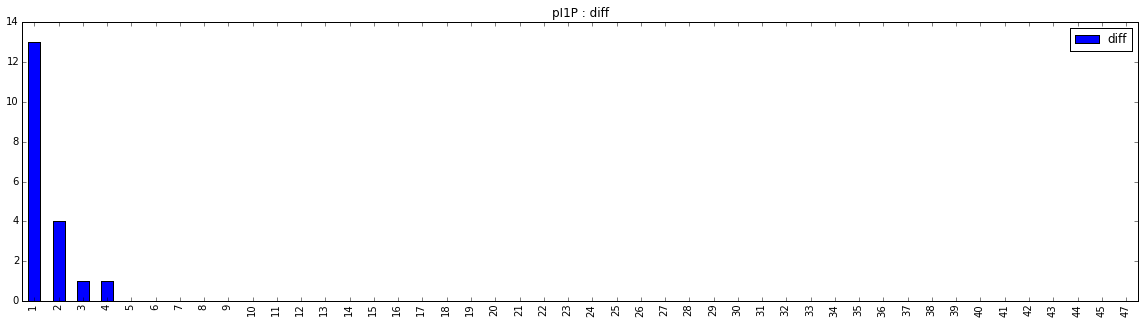

Legend


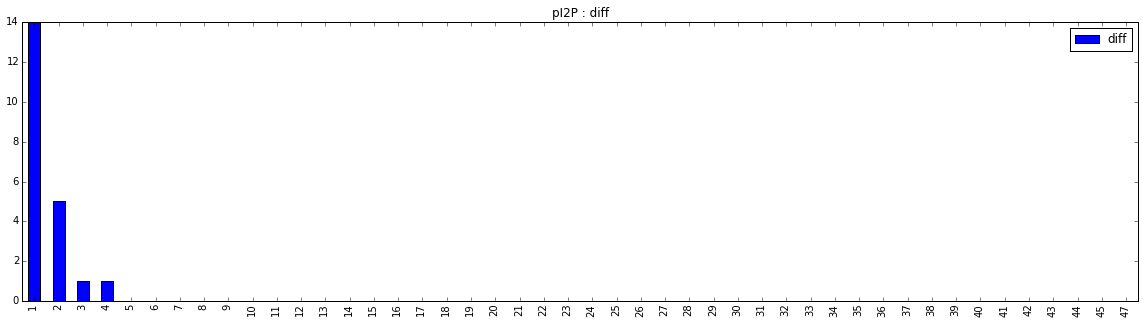

Legend


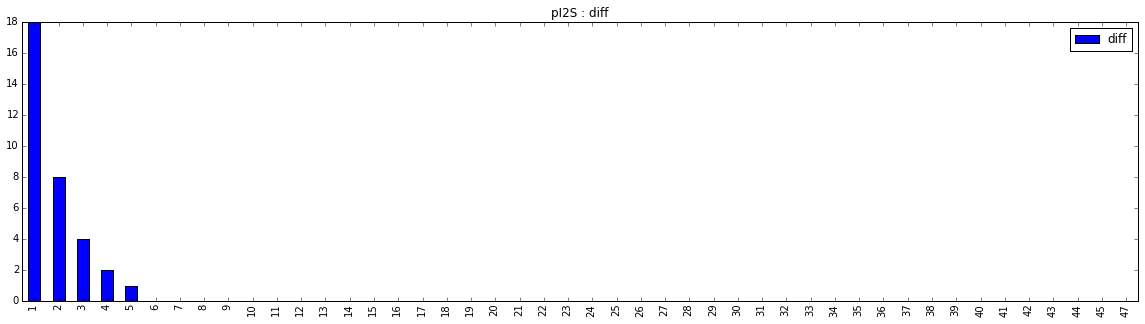

Legend


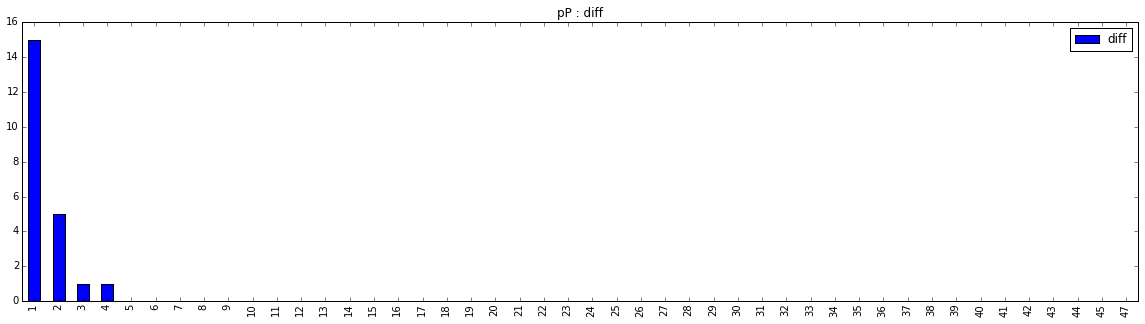

Legend


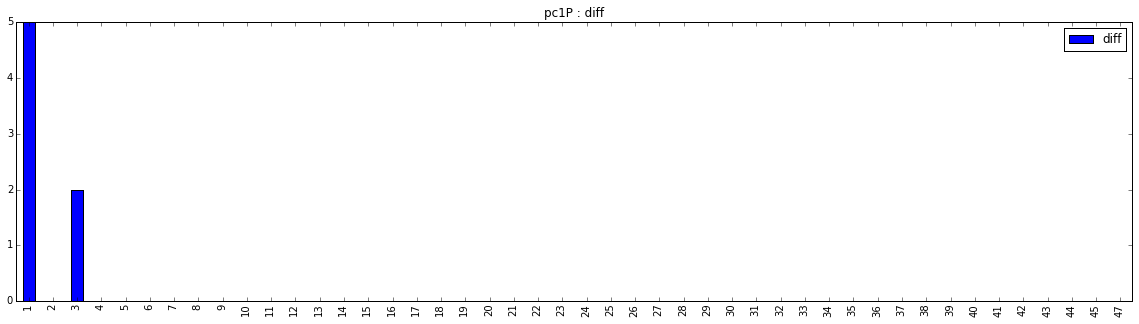

Legend


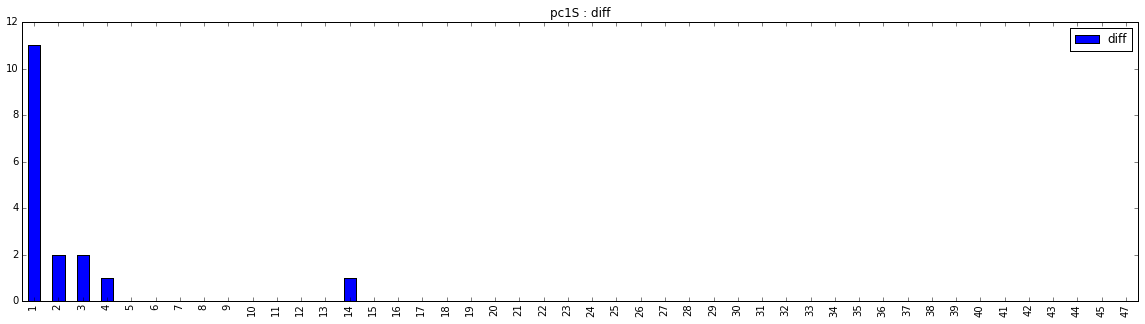

Legend


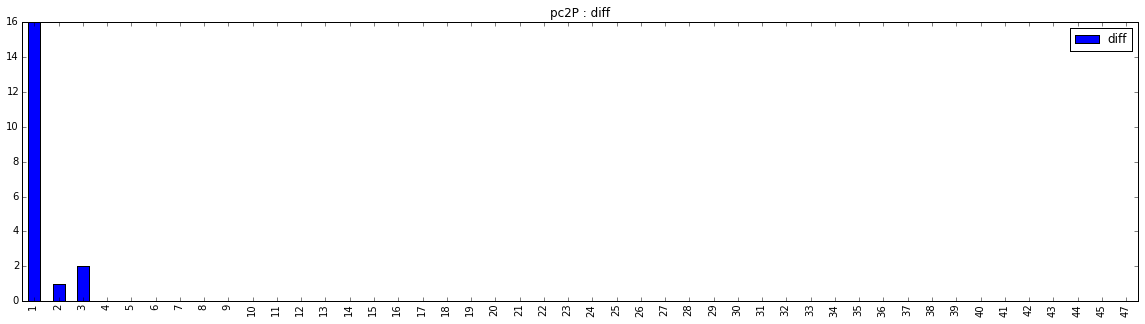

Legend


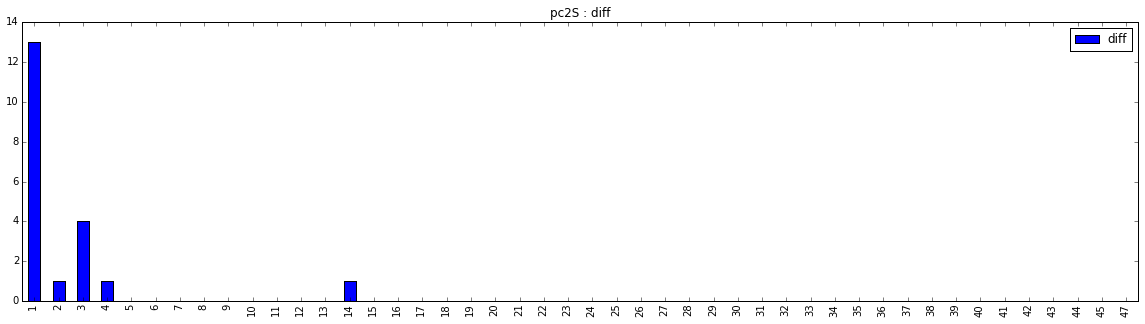

Legend


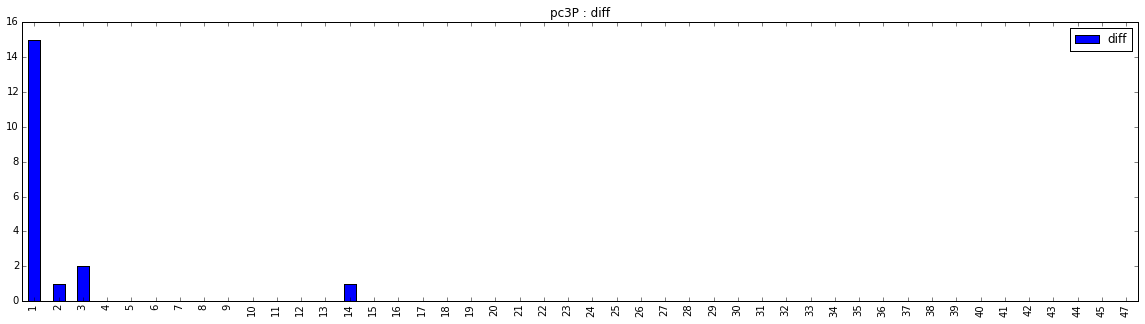

Legend


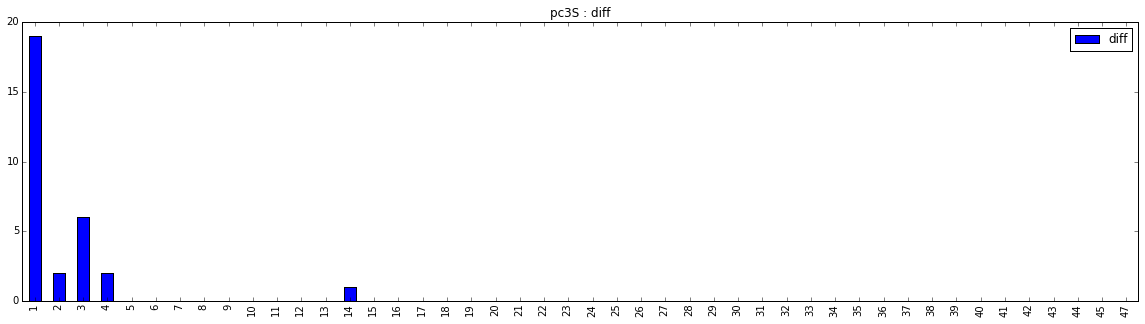

Legend


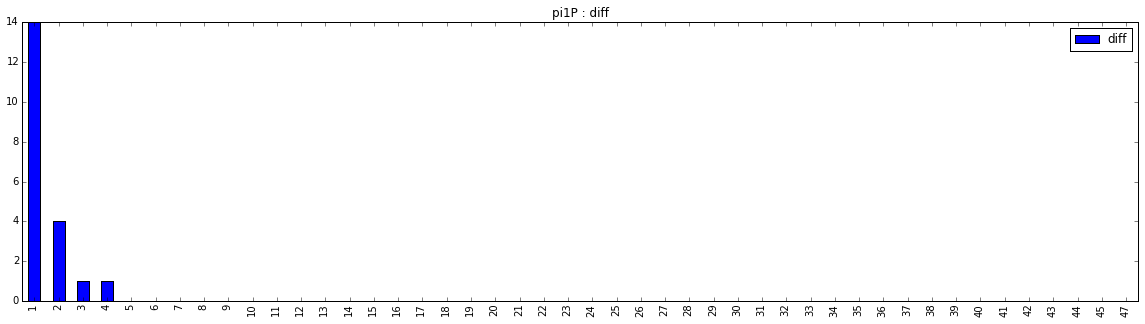

Legend


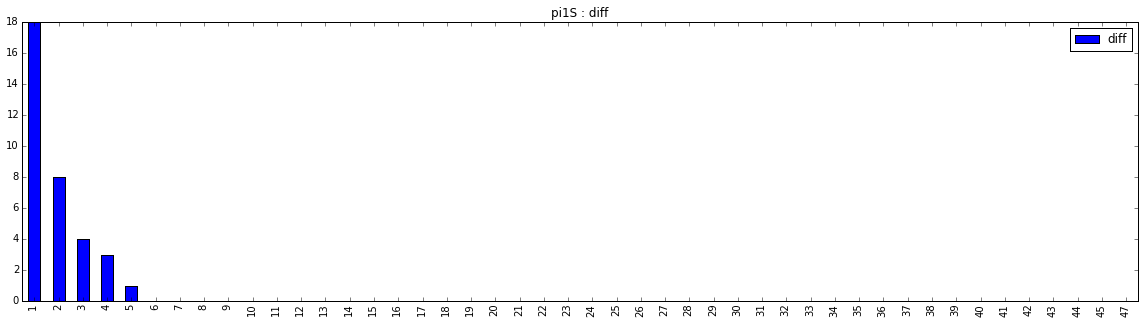

Legend


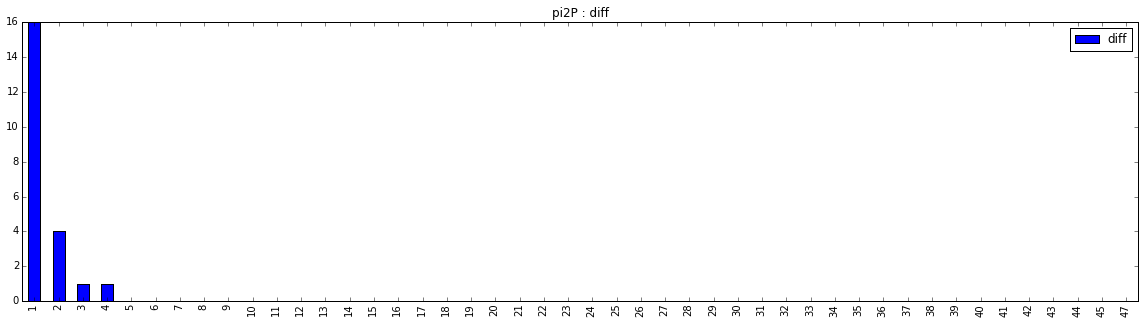

Legend


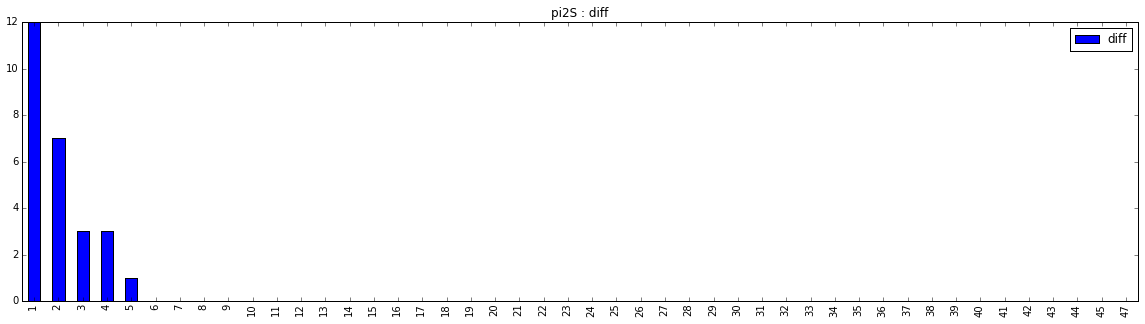

Legend


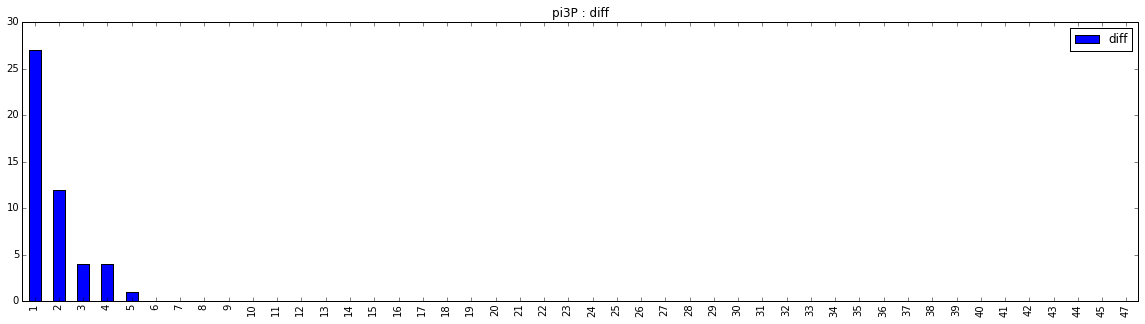

Legend


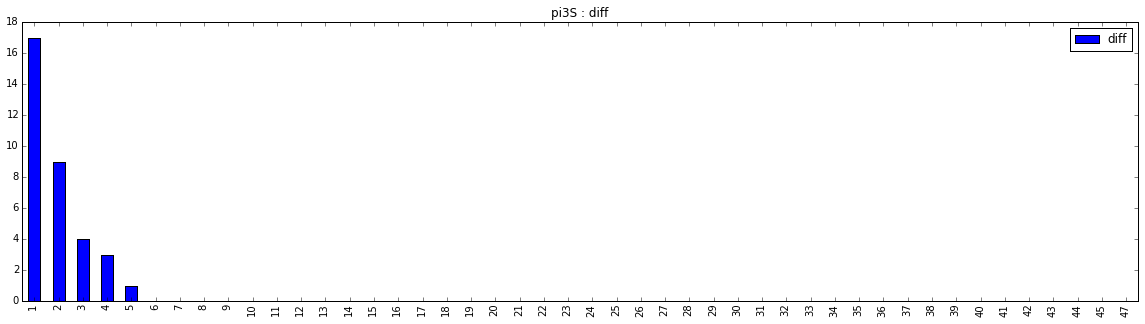

Legend


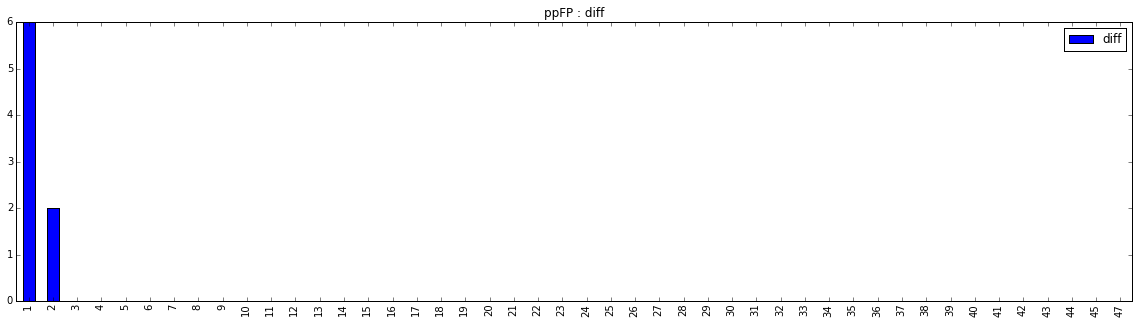

Legend


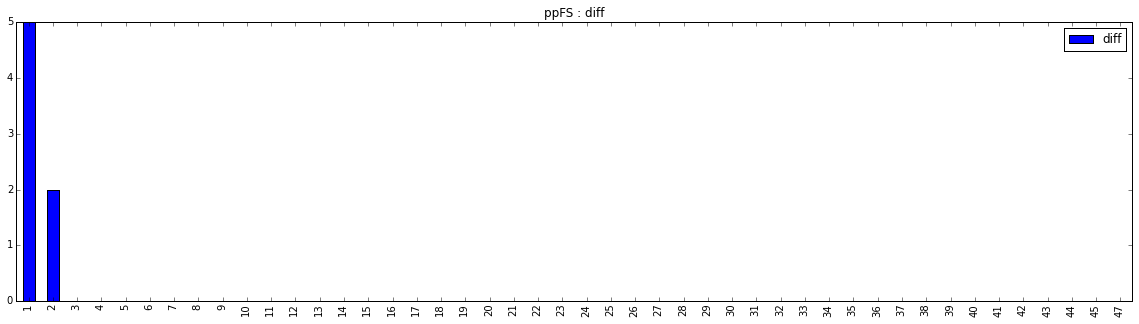

Legend


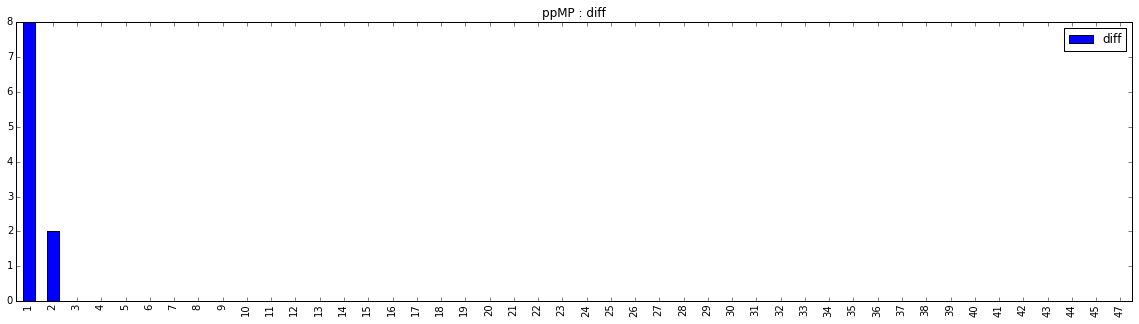

Legend


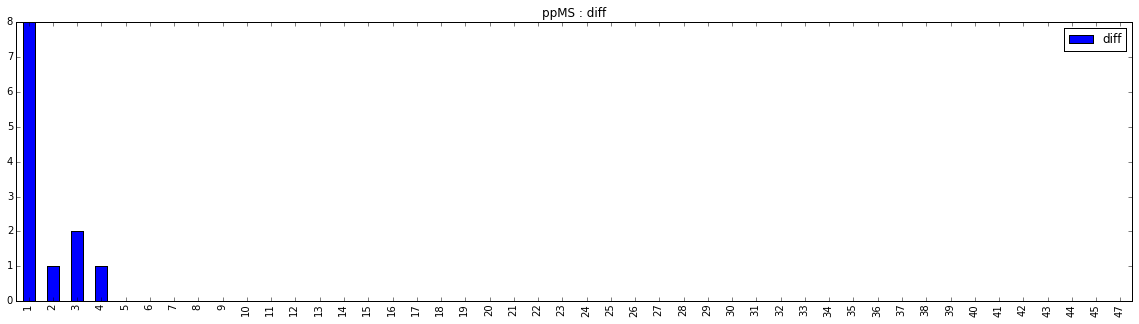

Legend


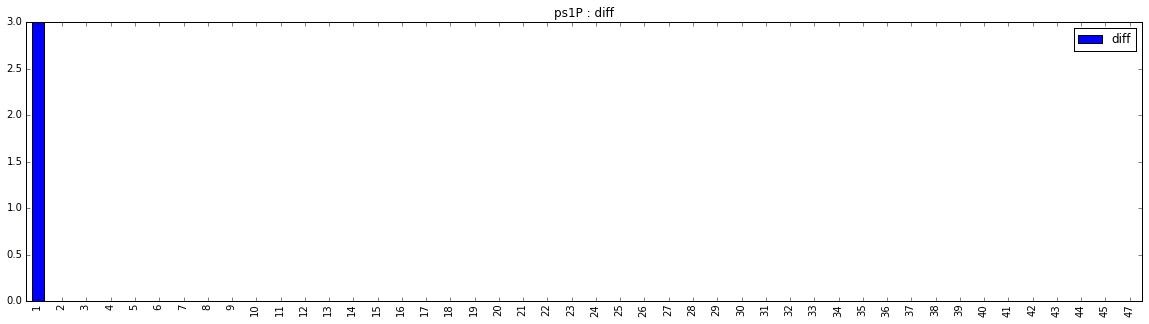

Legend


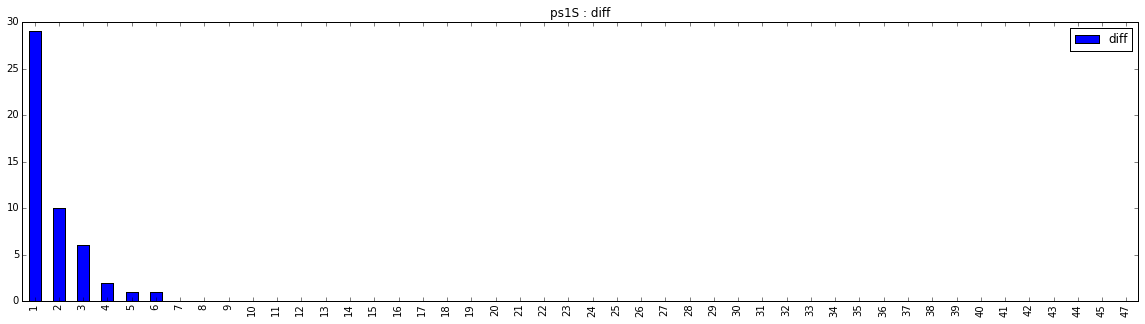

Legend


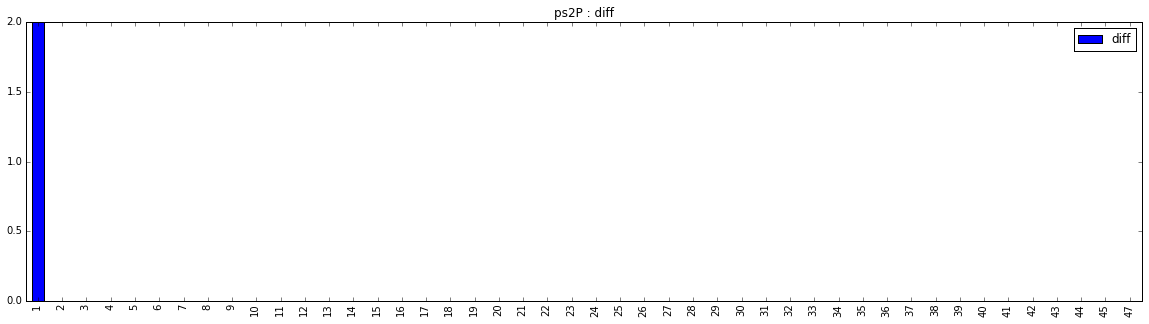

Legend


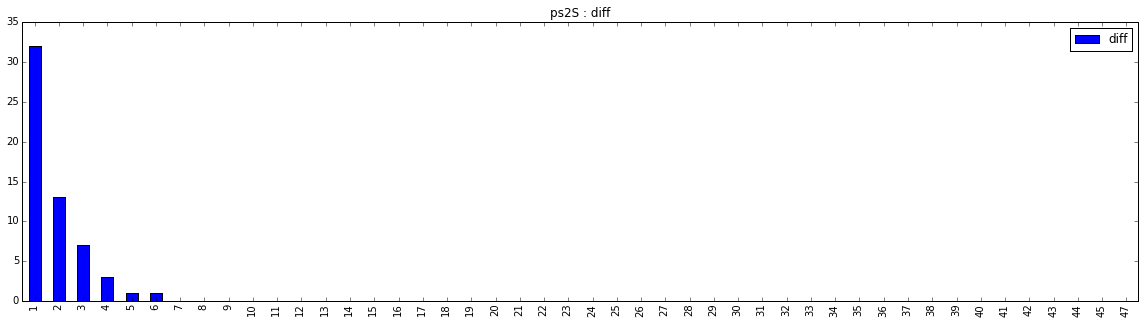

Legend


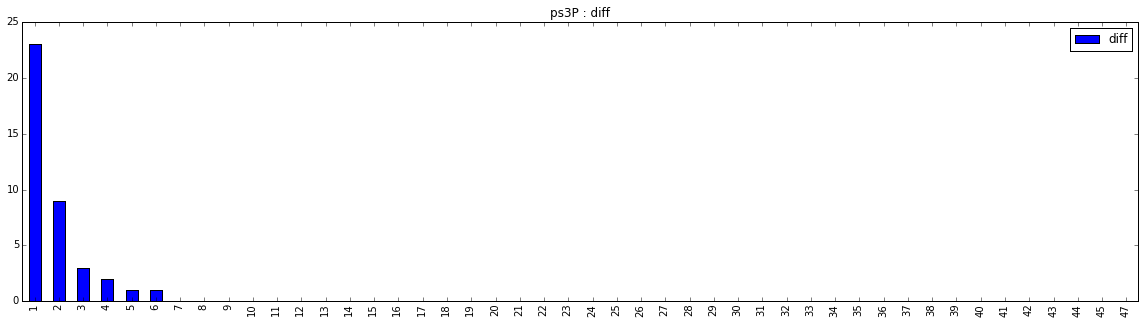

Legend


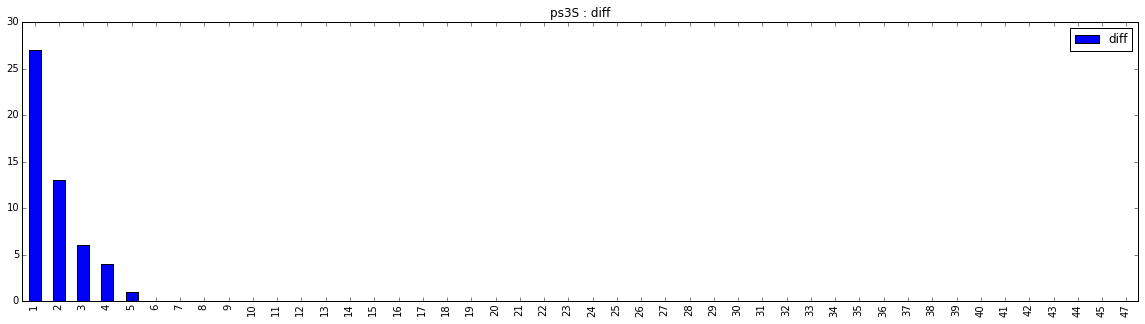

In [254]:
dimensions=["diff"]
mycolors={"diff":"red", "ok":"blue","miss":"green","over":"purple","overmiss":"black"}
for case in sorted(analysesCase.keys()):
    df=analysesCase[case]
#    df.plot(kind="bar", stacked=True)
#    print (nb,", ".join(dimensions))
    if not dimensions:
        df.plot(kind="bar", stacked=True)
        plt.title("%s : GLOBAL"%case)
    elif all(x in df.columns.values.tolist() for x in dimensions):
        df[dimensions].plot(kind="bar", stacked=True)
        plt.title("%s : "%(case)+", ".join(dimensions))
    print (plt.legend())
    plt.show()


In [100]:
histogrammes={}
for cle in comptage:
    for case in comptage[cle]:
        if not case in histogrammes:
            histogrammes[case]={}
        histogrammes[case][cle]=comptage[cle][case]
for case in histogrammes:
#    print (case)
    if case in lexicalComptages:
        histogrammes[case]["lexical"]=lexicalComptages[case]
    else:
        histogrammes[case]["lexical"]=0
    

In [171]:
from IPython.html.widgets import FloatProgress
from IPython.display import display
from time import sleep
display(f)
f = FloatProgress(min=0, max=100)
for i in xrange(100):
   sleep(0.1)
   f.value = i


:0: FutureWarning: IPython widgets are experimental and may change in the future.
